## Author: Ashcroft_J _Johnson 
#### MSc Data Analytcis 
#### BSc (Hons) Computer Science With Cyber Security
#### Email: ashcroft.j.johnson@outlook.com
#### Mobile: (0044) - 074 04 35 66 11

 ### I aim to answer the below questions, just to get the understanding of the data:
 #### And also, to provide a recommendation, prediction for sales,  and customers using the online services. 
 
 ### NB: The recommendations I provide will depend mostly on the nature of the business, the available data, and the business goals.

###  1. Customer-related Questions:

1. Who are our most valuable customers based on their purchasing behavior?
2. What is the distribution of customer purchases by country?
3. How many new customers did we acquire during this period, and how many existing customers made repeat purchases?

###  2. Product-related Questions:

1. Which products had the highest sales revenue during this period?
2. What are the best-selling products by quantity sold?
3. Which products have the highest profit margins?
4. Are there any products that consistently underperform in terms of sales?

### 3. Sales and Revenue Questions:

1. What is the overall trend in sales revenue over time?
2. Are there any seasonality patterns in sales data?


### 4.Geographic Questions:

1. Which countries generate the most sales for our business?
2. Are there any countries or regions with significant growth potential?
3. Do sales vary significantly by region, and if so, what factors might explain these variations?

### 5. Customer Behavior Questions:

1. What is the customer retention rate during this period?
2. Are there any notable trends in customer behavior, such as changing purchase patterns?
3. What is the average order size, and has it changed over time?

### 6.Inventory and Stock Questions:

1. Do we have any inventory management issues, such as overstocking or stockouts for specific products?
2. Are there products with low turnover rates that might need attention?
3. How can we optimize our inventory levels based on sales trends?

### 7. Profitability Questions:

1. What is the overall profitability of our business during this period?
2. Are there customer segments or product categories that contribute significantly to our profitability?
4. Can we identify any cost-saving opportunities or areas where we can increase profit margins?

### 8. Customer Segmentation Questions:
1. How can we segment our customers based on their buying behavior?
2. Do different customer segments exhibit distinct preferences for products or shopping patterns?
3. What marketing strategies can be tailored to each customer segment?

### 9. Operational Efficiency Questions:
1. Are there any operational inefficiencies, such as delays in order processing or shipping, that need addressing?
2. How can we improve the efficiency of our supply chain based on sales and demand patterns?
3. Customer Satisfaction and Feedback Questions:

### 11. Do we have access to customer feedback or satisfaction surveys?
### 12. Are there any common customer complaints or issues that require attention?

In [1]:
# I installed these libraries while running the cell.
!pip install missingno
!pip install yellowbrick


import os
import matplotlib
import matplotlib as data
from matplotlib import rcParams
import missingno as msno

# Absence of ignore warning to makes juypyter notebook nicer
import warnings
warnings.filterwarnings('ignore')
import numpy as ashcroft
import pandas as johnny

#visualization libraries been imported 
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as johnson
import matplotlib.pyplot as mining
import plotly.figure_factory as ff

#error evaluation
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn import linear_model

#Very effective for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from pandas import Series, DataFrame
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D

# models needed
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

#Checking Z value for outlier treatment
from scipy import stats

# For time series analysis
from datetime import datetime
import re

# For best features selection / dimensionality reduction
from sklearn.decomposition import PCA


from sklearn.impute import SimpleImputer

# Get the graphs to show in the jupyter notebook
%matplotlib inline

## Step 1 - Load the data from excel file to a pandas DataFrame

1. First block loads the data from my laptop into a pandas data frame for the descriptive analysis

In [2]:
# Datasets are imported for analysis using johnny.Read command
# load the dataset
# Read the dataset 
online_data = johnny.read_excel('Online Retail.xlsx')

# When the above dataset have been read it will be stored in a variable online_data

display(online_data)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Preprocessing of data begins here!!

In [4]:
# checks the number of columns found with our dataset.

print("The total length of the online Retail Dataset is: " , len(list(online_data[0:1:-1])))

The total length of the online Retail Dataset is:  8


## Checking the size of our online retail dataset

1. Using the jupyter notebook in-bulit function

In [5]:
# The code below will output the size of our dataset.
# This will assist you in determining its size and attributes/features.
print("The total size of Online Retail Dataset is: ",  online_data.shape)

The total size of Online Retail Dataset is:  (541909, 8)


# The Dot info function () will give you all the vital information found in the dataset

In [6]:
# This gives the summary of our dataset.
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## The dot info command used above,  tells us about null (NAN) values exist in columns of  our dataset

1. There are no null columns to be found.

2. However, the NaN values are occasionally replaced with other special characters.

3. To test for this, we will generate a small number of random samples to see whether we can detect any peculiar characters in the online retail dataset.

In [7]:
# This sample function will auto generates 50 rows of information pertaining to our dataset
online_data.sample(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
387627,570342,22348,TEA BAG PLATE RED RETROSPOT,6,2011-10-10 12:26:00,0.85,17706.0,United Kingdom
521096,580311,22279,POCKET BAG BLUE PAISLEY RED SPOT,12,2011-12-02 14:48:00,1.25,18245.0,United Kingdom
284419,561871,21915,RED HARMONICA IN BOX,12,2011-07-31 11:46:00,1.25,13018.0,United Kingdom
93384,544293,22417,PACK OF 60 SPACEBOY CAKE CASES,2,2011-02-17 12:42:00,0.55,17954.0,United Kingdom
418285,572704,20675,BLUE POLKADOT BOWL,5,2011-10-25 14:39:00,2.46,NaN,United Kingdom
158060,550272,23002,TRAVEL CARD WALLET SKULLS,72,2011-04-15 12:14:00,0.42,18079.0,United Kingdom
535552,581217,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 09:20:00,10.79,NaN,United Kingdom
385929,C570221,22961,JAM MAKING SET PRINTED,-2,2011-10-09 12:56:00,1.45,13113.0,United Kingdom
328330,565766,21231,SWEETHEART CERAMIC TRINKET BOX,1,2011-09-06 14:23:00,1.25,17841.0,United Kingdom
21232,538071,84380,SET OF 3 BUTTERFLY COOKIE CUTTERS,2,2010-12-09 14:09:00,2.51,NaN,United Kingdom


## FACING VALUES THAT ARE MISSING

1. The sample provided above show that our dataset contains some NAN values, and we need to discover a statistical method to manage them.

2. Different methods exist in Pandas for handling missing values.

3. Dropping the instance or row that contains the missing value might be a straightforward way to deal with missing values (s)

4. Missing values are recognised in Python as np.nan (NaN values in numpy). The following are some typical strategies or procedures for replacing missing values:

(a) - Using the df.dropna function, dropping or eliminating columns or rows in the data that contain missing values ()

(a) - Using the df.fillna() function to add or replace any missing values Different numbers can be used to fill in the gaps: they can be average, constant values like mean, mode, or median.

5. Let's see which columns truly have the missing information using the for loop below:

In [8]:
# Checks all columns to see the missing values.
[features for features in online_data.columns if online_data[features].isnull().sum()>0]

['Description', 'CustomerID']

In [9]:
#check for missing values in all the columns

online_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## We seem to have identical rows containing blank spaces for the Customer ID and Description. 

1. Furthermore, We pointed out that the unit price is 0.0, which is erroneous.

In [10]:
checking_msissing = online_data.loc[online_data.Description.isnull()]

checking_msissing 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


# We also want to double-check the unit price.

In [11]:
# This code below will check the unit price.
checking_msissing.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

# Determine the percentage of customers & Description with null id 

In [12]:
# The below formula compute percentage of customers and Description in this dataset

print("Percentage of customers with NA values are: ", round(online_data['CustomerID'].isnull().sum() * 100 / len(online_data), 2),"%")

print("Percentage of Descriptions with NA values are: ", round(online_data['Description'].isnull().sum() * 100 / len(online_data), 2),"%")

Percentage of customers with NA values are:  24.93 %
Percentage of Descriptions with NA values are:  0.27 %


## Data Visualization 

1. The bar plot below helps you to visualise the Missing Values or NAN Values in the dataset

total number of obseration is: 541909


<AxesSubplot:>

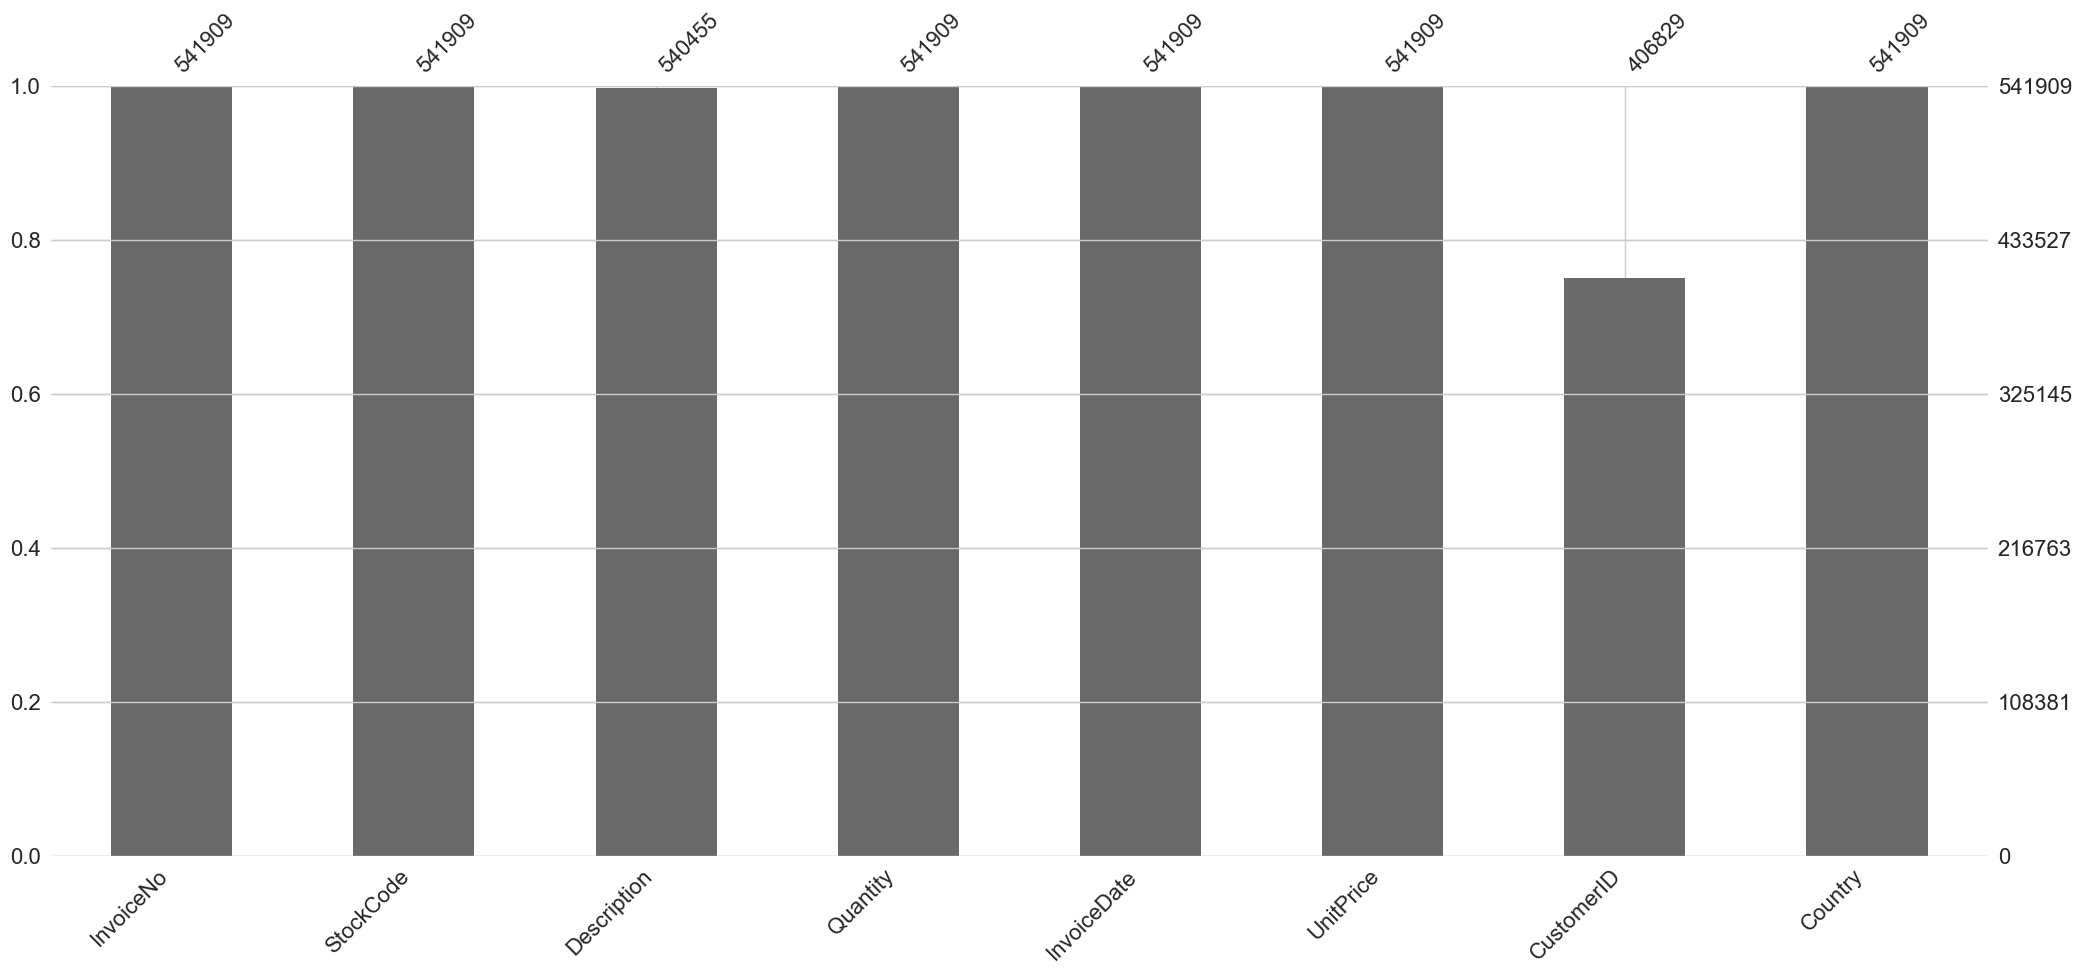

In [13]:
print ('total number of obseration is:',online_data.shape[0])
msno.bar(online_data)

## We Apply Data Cleaning Techniques to Our Online Retail Dataset

1. We use the dropna() function to has been used to treat all the Null values in online retail dataset

2. This will enable us handle all Null Values found within our dataset

3. According to what we predicted based on the previous information produced on the unit price.

4. Hence those 1454 records are invalid and contain missing information and inaccurate values.

5. The best solution is to remove those rows.

In [14]:
null_columns = online_data.columns[online_data.isnull().any()]
online_data[null_columns].isnull().sum()

Description      1454
CustomerID     135080
dtype: int64

In [15]:
# This function will drop all the null values found in our dataset
online_data = online_data.dropna()

## Double checking if all the null values have been deleted

1. By using MSNO to visualize

<AxesSubplot:>

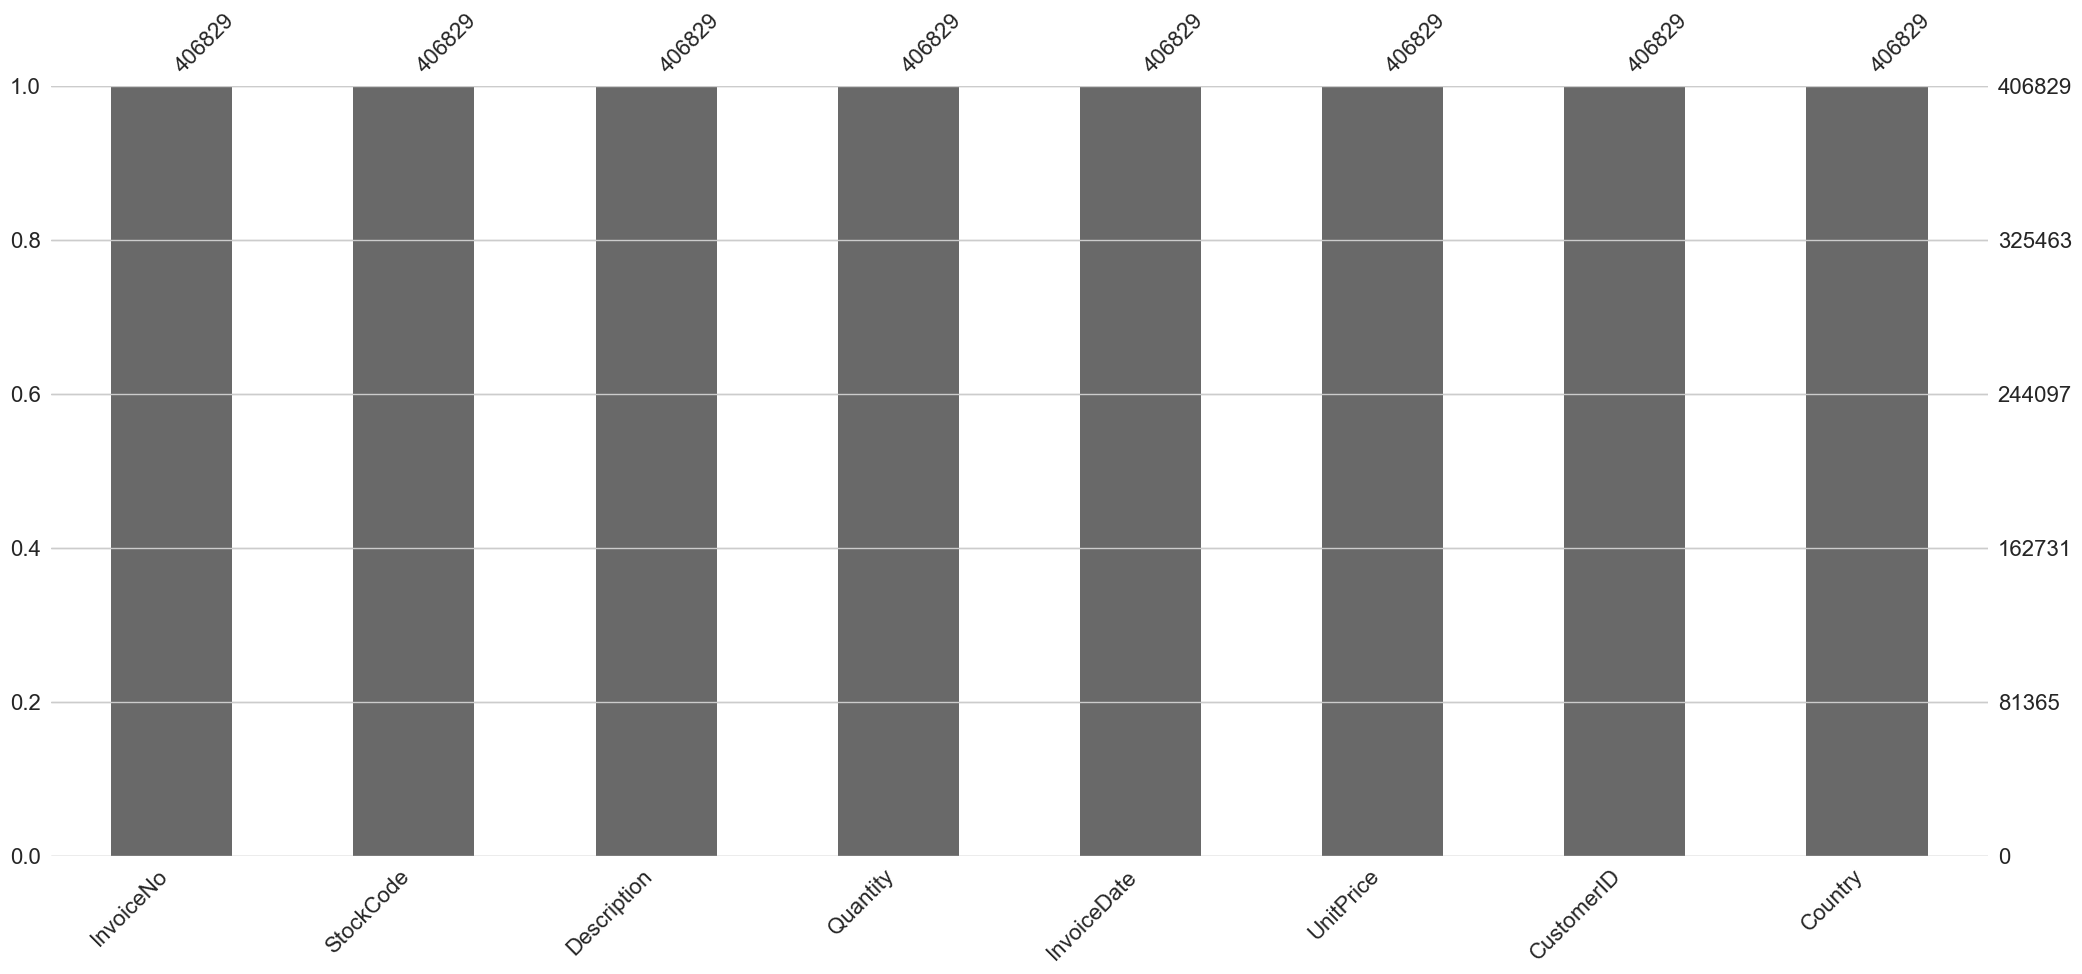

In [16]:
msno.bar(online_data)

In [17]:
print('{null_sum} \n\n {online_data_info}'.format(null_sum=online_data.isna().sum(), online_data_info=online_data.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64 

 None


# Exploratory Data Analysis (EDA)

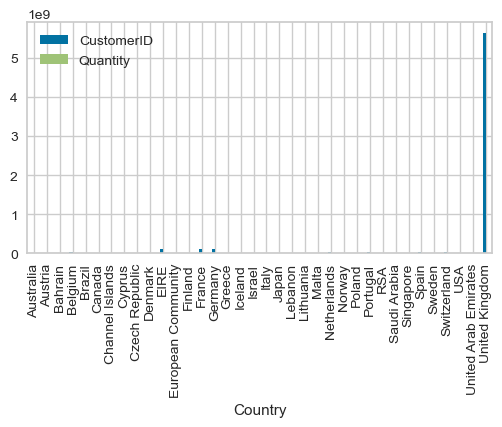

In [18]:
# Use this funtion to get the country , quantity, and customer Id
country_Customer = online_data.groupby("Country")["CustomerID", "Quantity"].sum()
country_Customer.plot.bar(figsize=(6, 3))
mining.show()

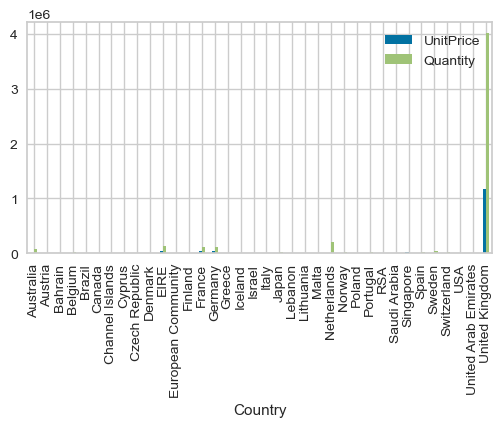

In [19]:
country_Customer = online_data.groupby("Country")["UnitPrice", "Quantity"].sum()
country_Customer.plot.bar(figsize=(6, 3))
mining.show()

# Originating countries of our clients:

In [20]:
# This displays where our customers comes from

origin_customer = online_data.groupby("Country")["CustomerID"].sum()

origin_customer

Country
Australia               1.569300e+07
Austria                 5.021102e+06
Bahrain                 2.100270e+05
Belgium                 2.571829e+07
Brazil                  4.086080e+05
Canada                  2.615483e+06
Channel Islands         1.128522e+07
Cyprus                  7.715880e+06
Czech Republic          3.834300e+05
Denmark                 4.876734e+06
EIRE                    1.103917e+08
European Community      9.215880e+05
Finland                 8.699324e+06
France                  1.076489e+08
Germany                 1.200751e+08
Greece                  2.008584e+06
Iceland                 2.247154e+06
Israel                  3.164467e+06
Italy                   1.015666e+07
Japan                   4.567292e+06
Lebanon                 5.743800e+05
Lithuania               5.366200e+05
Malta                   2.158496e+06
Netherlands             3.419054e+07
Norway                  1.350765e+07
Poland                  4.341972e+06
Portugal                1.8864

<AxesSubplot:title={'center':'Countries with the customers'}, xlabel='Country'>

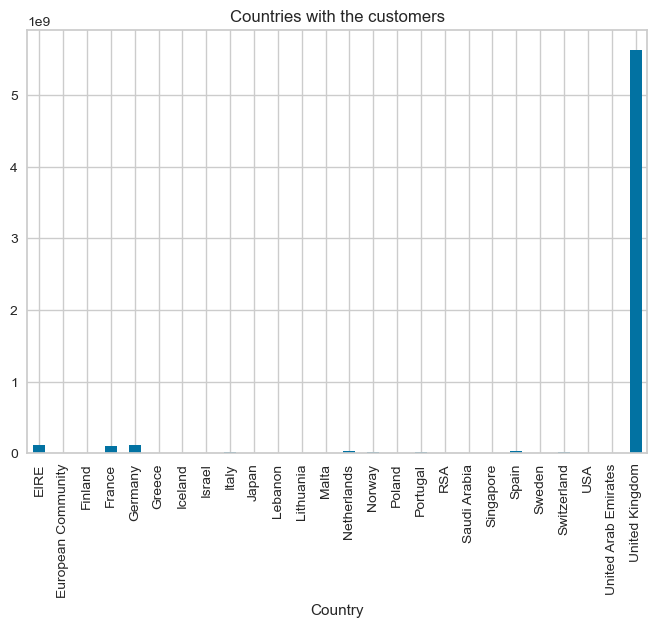

In [21]:
# Top countries with customers

origin_customer[10:].plot(kind = 'bar', title = 'Countries with the customers')

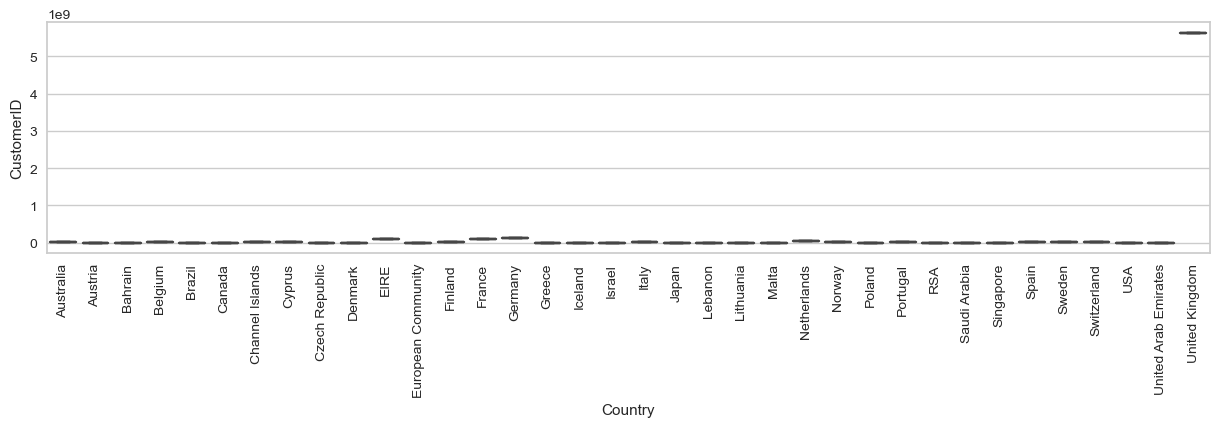

In [22]:
mining.figure(figsize = (15, 3))
johnson.boxplot(x=origin_customer.index, y=origin_customer.values)
mining.ylabel("CustomerID")
mining.xticks(rotation=90)
mining.show()

# Let investigate the country with the highest quantity order

In [23]:
# This displays which country has the highest order

quant_country = online_data.groupby("Country")["Quantity"].sum()

quant_country

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     136329
European Community          497
Finland                   10666
France                   109848
Germany                  117448
Greece                     1556
Iceland                    2458
Israel                     3990
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16044
RSA                         352
Saudi Arabia                 75
Singapore                  5234
Spain                     26824


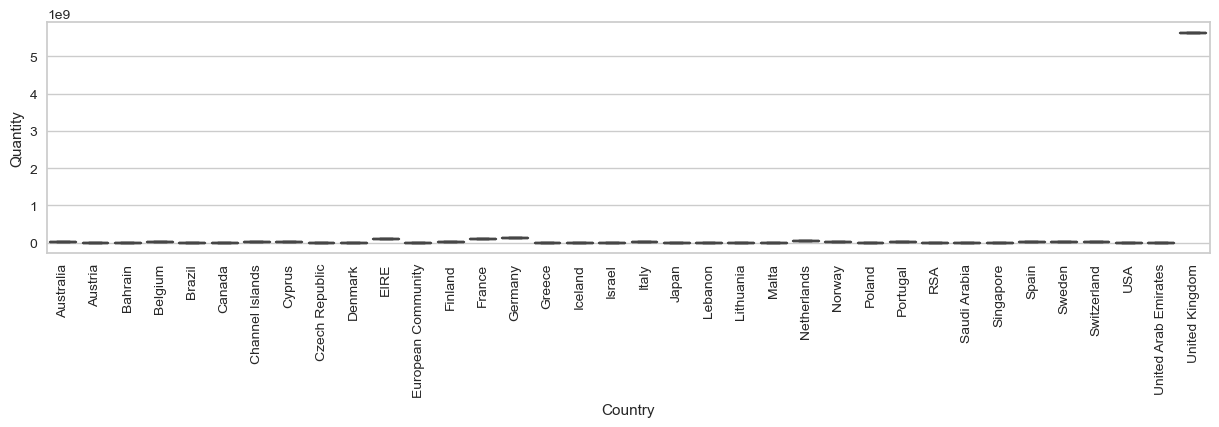

In [24]:
mining.figure(figsize = (15, 3))
johnson.boxplot(x=origin_customer.index, y=origin_customer.values)
mining.ylabel("Quantity")
mining.xticks(rotation=90)
mining.show()

            Quantity  UnitPrice  CustomerID
Quantity    1.000000  -0.001238    -0.00360
UnitPrice  -0.001238   1.000000    -0.00456
CustomerID -0.003600  -0.004560     1.00000


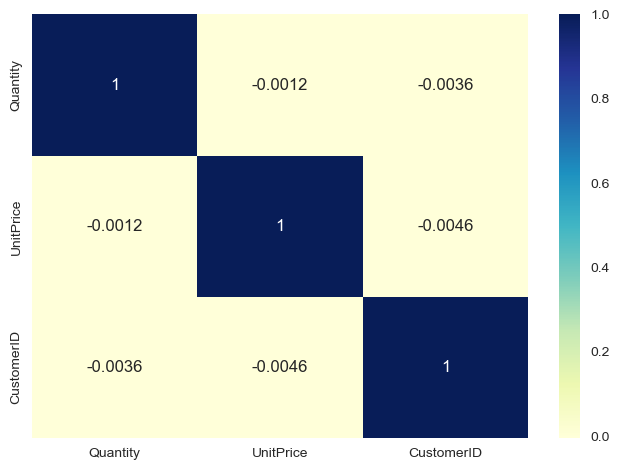

In [25]:
print(online_data.corr())
  
# plotting correlation heatmap
dataminig = johnson.heatmap(online_data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mining.show()

## Finding Unique Values using unique function

1. The unique function helps you to see all the assign numbers to each column

In [26]:
# This loop displays all the names along with values of each its attribute.

for i in online_data.columns:
    print(i, ':', len(online_data[i].unique()))

InvoiceNo : 22190
StockCode : 3684
Description : 3896
Quantity : 436
InvoiceDate : 20460
UnitPrice : 620
CustomerID : 4372
Country : 36


# The function written below output all the categorical variables found in the dataset:

In [27]:
# Exploring the unique values of each attributes
for col_name in online_data.columns:
    if online_data[col_name].dtypes == 'object':
        unique_cat = len(online_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name =col_name, unique_cat=unique_cat))

Feature 'InvoiceNo' has 22190 categories
Feature 'StockCode' has 3684 categories
Feature 'Description' has 3896 categories
Feature 'Country' has 36 categories


## Further investigation in order to handle all NAN values in our dataset:

1. We must now handle the missing data. 

2. We will verify the columns and, if the value is categorical and the mode is significantly higher than other values, replace it with the mode; 

3. otherwise, we will replace it with the median.

4. We must first verify the categories or numeric data in each column (categorical or numeric),by using the below function.

In [28]:
all_columns = list(online_data.columns)
print('all_columns in our dataset:\n {}'.format(all_columns))

all_categorical_columns = list(online_data.select_dtypes(include=['object']).columns)
print('All Categorical columns are:\n {}'.format(all_categorical_columns))

only_numerical_columns = list(online_data.select_dtypes(include=['int64', 'float64']).columns)
print('Only Numerical columns are:\n {}'.format(only_numerical_columns))

all_columns in our dataset:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
All Categorical columns are:
 ['InvoiceNo', 'StockCode', 'Description', 'Country']
Only Numerical columns are:
 ['Quantity', 'UnitPrice', 'CustomerID']


## Exploration of Data

1. We can now go on to the more in-depth study of each since we have reviewed the data and located the numeric and categorical columns:

In [29]:
# This gives the summary of the dataset we are working on

online_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Knowing the data types that exist in online retail dataset

In [30]:
# dtypes displays all the data types found within our dataset
print(online_data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


## We can see that customerID and Description have different sizes when the data are null. 

1. We will look at the statistics behind of our dataset:

2. The describe functions will show some statistical measures starting from Mean, Std, Min, 25%,  50%, 75%,and Max.


In [31]:
# This assists us in analysing quantitative/numerical data.
online_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [32]:
# Using the describe function
# This helps us analysis quantitative / numeric data
online_data.describe().T

# It is clear that there is a wide range and great variability in the figures for Quantity and UnitPrice.
# The Quantity column's median value of 3 (50th percentile) and average value of 9.55
# may indicate that these customers are not very interested in some of our products, 
# which should be taken into account when addressing the nation's high purhasing order.

# Similarily, average value of UnitPrice 4.611 whiles the column of median value of 2.08 (50th percentile).

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


# Checking for all the cancelled transaction that exist in online retail dataset

In [33]:
# Checking for all the cancelled transaction that exist in online retail dataset
online_data['canceled'] = list(map(lambda x: 'C' in str(x), online_data['InvoiceNo']))
canceled_orders = online_data[online_data['canceled'] == True]

canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True


# Let us determine the biggest  cancelled orders

In [34]:
# Get the cancelled transactions

cancelled_orders = online_data[online_data['InvoiceNo'].astype(str).str.contains('C')]

cancelled_orders.head()

# The code will seacrh for particular transaction where the quantity ==-80995
cancelled_orders[cancelled_orders['Quantity'] ==-80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,True


# Customer-related Questions

### 1. Who are our most valuable customers based on their purchasing behavior?

In [35]:
# Import necessary libraries
import pandas as pd

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Step 2: Calculate the total purchase amount for each customer
customer_purchase = online_data.groupby('CustomerID')['Quantity'].sum().reset_index()
customer_purchase.rename(columns={'Quantity': 'TotalPurchase'}, inplace=True)

# Step 3: Rank the customers based on their total purchase amount
customer_purchase_ranked = customer_purchase.sort_values(by='TotalPurchase', ascending=False)

# Step 4: Display the top N customers as the most valuable (e.g., top 10 customers)
top_n_customers = 10
most_valuable_customers = customer_purchase_ranked.head(top_n_customers)

# Display the most valuable customers
most_valuable_customers


,CustomerID,TotalPurchase
1703,14646.0,196719
55,12415.0,77242
1895,14911.0,77180
3758,17450.0,69029
4233,18102.0,64122
3801,17511.0,63012
1005,13694.0,61803
1447,14298.0,58021
1345,14156.0,57025
3202,16684.0,49390


## What is the distribution of customer purchases by country?

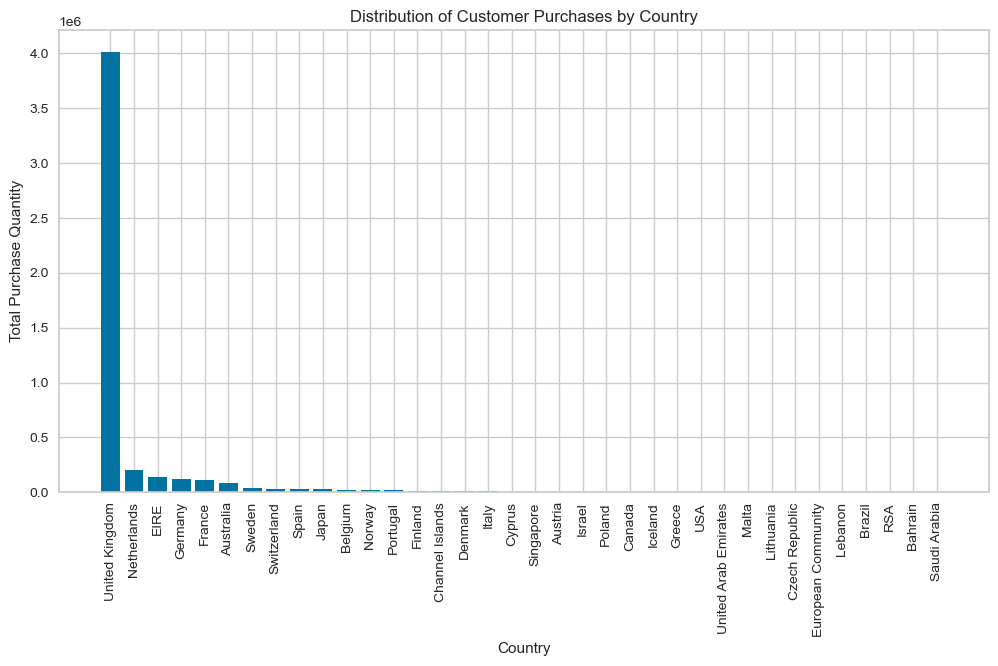

In [36]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Group the data by 'Country' and calculate the total purchase amount for each country
country_purchases = online_data.groupby('Country')['Quantity'].sum().reset_index()

# Sort the data by total purchase amount in descending order
country_purchases = country_purchases.sort_values(by='Quantity', ascending=False)

# Plot the distribution of customer purchases by country
plt.figure(figsize=(12, 6))
plt.bar(country_purchases['Country'], country_purchases['Quantity'])
plt.xlabel('Country')
plt.ylabel('Total Purchase Quantity')
plt.title('Distribution of Customer Purchases by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


## How many new customers did we acquire during this period, and how many existing customers made repeat purchases?

In [37]:
# Import necessary libraries
import pandas as pd

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Convert the 'InvoiceDate' column to a datetime data type
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Define the specific period you want to analyze (e.g., from_date to to_date)
from_date = pd.to_datetime('2023-01-01')  # Replace with your actual start date
to_date = pd.to_datetime('2023-12-31')    # Replace with your actual end date

# Filter the data for the specified period
period_data = online_data[(online_data['InvoiceDate'] >= from_date) & (online_data['InvoiceDate'] <= to_date)]

# Group the data by 'CustomerID' and calculate the first and last purchase dates
customer_purchase_dates = period_data.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).reset_index()

# Count the number of customers who made their first purchase during the period (new customers)
new_customers = customer_purchase_dates[customer_purchase_dates['min'] >= from_date]['CustomerID'].nunique()

# Count the number of customers who made repeat purchases (existing customers)
existing_customers = customer_purchase_dates[customer_purchase_dates['min'] < from_date]['CustomerID'].nunique()

# Display the results
print(f"New Customers Acquired During the Period: {new_customers}")
print(f"Existing Customers Who Made Repeat Purchases: {existing_customers}")


New Customers Acquired During the Period: 0
Existing Customers Who Made Repeat Purchases: 0


# Based on the above results: No new customer and existing customers made repeat purchases

## The analysis indicates that there were no new customers acquired during the specified period, and no existing customers made repeat purchases, it suggests that there may be issues or challenges related to customer acquisition and retention. Here are some recommendations based on this situation:

### 1.Customer Acquisition Strategies:

1. Evaluate your current customer acquisition strategies. Are you targeting the right audience? Consider revisiting your marketing campaigns and channels to attract new customers.

## 2. Customer Retention Programs:

1. Develop and implement customer retention programs to encourage repeat purchases. Loyalty programs, personalized offers, and excellent customer service can help retain existing customers.

## 3.Customer Engagement:

1. Focus on engaging your existing customer base through email marketing, newsletters, and social media. Keep them informed about new products, promotions, and updates.

## 4. Data Analysis and Segmentation:

1. Analyze customer data further to understand why there were no new customers and no repeat purchases. Segment your customer base to identify potential target groups.

## 5.Competitor Analysis:

1. Research your competitors to see if they are successfully acquiring new customers or retaining existing ones. Learn from their strategies and adapt as needed.

## 6. Feedback and Surveys:

1. Collect feedback from your customers to understand their needs and preferences. Use surveys to gather insights into why customers may not be returning or why new customers are not converting.

## 7. Product or Service Improvements:

1. Ensure that your products or services meet customer expectations. Continuous improvement based on feedback can attract new customers and keep existing ones coming back.

## 8. Market Research:

1. Revisit your market research to identify changes in customer behavior or preferences. Stay up-to-date with industry trends and adapt your offerings accordingly.

## 9. Customer Experience Enhancement:

1. Enhance the overall customer experience, from the website or store layout to the checkout process. A positive experience can lead to both new customers and repeat business.


## 10. Measurement and Monitoring:

1. Set clear metrics and KPIs for customer acquisition and retention. Regularly monitor these metrics to track progress and make data-driven decisions.

## Product-related Questions

### 1. Which products had the highest sales revenue during this period?

In [38]:
# Import necessary libraries
import pandas as pd

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Convert the 'InvoiceDate' column to a datetime data type
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Define the specific period you want to analyze (e.g., from_date to to_date)
from_date = pd.to_datetime('2010-12-01')  # Replace with your actual start date
to_date = pd.to_datetime('2011-12-09')    # Replace with your actual end date

# Filter the data for the specified period
period_data = online_data[(online_data['InvoiceDate'] >= from_date) & (online_data['InvoiceDate'] <= to_date)]

# Calculate the sales revenue for each product (Quantity * UnitPrice)
period_data['SalesRevenue'] = period_data['Quantity'] * period_data['UnitPrice']

# Group the data by 'StockCode' (product) and calculate the total sales revenue
product_sales = period_data.groupby('StockCode')['SalesRevenue'].sum().reset_index()

# Sort the products by total sales revenue in descending order
product_sales = product_sales.sort_values(by='SalesRevenue', ascending=False)

# Display the products with the highest sales revenue (e.g., top 10 products)
top_n_products = 10
highest_revenue_products = product_sales.head(top_n_products)

# Display the results
highest_revenue_products


,StockCode,SalesRevenue
1222,22423,132742.90
3365,85123A,93976.25
3359,85099B,83215.96
2411,47566,67687.53
3682,POST,66551.24
2609,84879,56472.18
1853,23084,50985.32
1296,22502,46980.95
2475,79321,45925.31
919,22086,41429.68


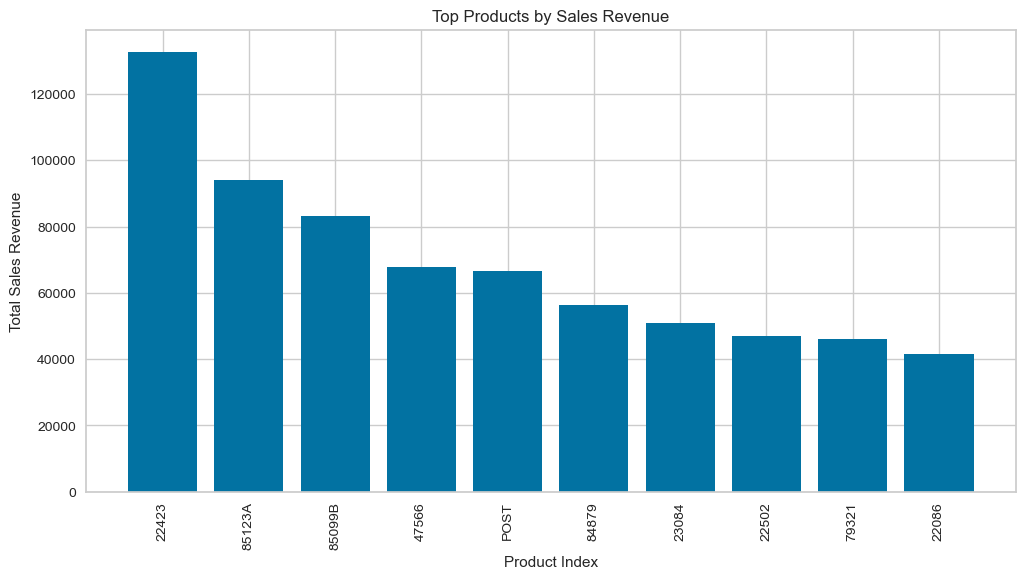

In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Convert the 'InvoiceDate' column to a datetime data type
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Define the specific period you want to analyze (e.g., from_date to to_date)
from_date = pd.to_datetime('2010-12-01')  # Replace with your actual start date
to_date = pd.to_datetime('2011-12-09')    # Replace with your actual end date

# Filter the data for the specified period
period_data = online_data[(online_data['InvoiceDate'] >= from_date) & (online_data['InvoiceDate'] <= to_date)]

# Calculate the sales revenue for each product (Quantity * UnitPrice)
period_data['SalesRevenue'] = period_data['Quantity'] * period_data['UnitPrice']

# Group the data by 'StockCode' (product) and calculate the total sales revenue
product_sales = period_data.groupby('StockCode')['SalesRevenue'].sum().reset_index()

# Sort the products by total sales revenue in descending order
product_sales = product_sales.sort_values(by='SalesRevenue', ascending=False)

# Display the products with the highest sales revenue (e.g., top 10 products)
top_n_products = 10
highest_revenue_products = product_sales.head(top_n_products)

# Create numeric indices for the products
product_indices = range(len(highest_revenue_products))

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(product_indices, highest_revenue_products['SalesRevenue'])
plt.xlabel('Product Index')
plt.ylabel('Total Sales Revenue')
plt.title('Top Products by Sales Revenue')
plt.xticks(product_indices, highest_revenue_products['StockCode'], rotation=90)  # Use product indices as x-labels
plt.show()


## What are the best-selling products by quantity sold?

In [40]:
# Import necessary libraries
import pandas as pd

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Group the data by 'StockCode' (product) and calculate the total quantity sold
product_quantity = online_data.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order
product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

# Display the best-selling products by quantity sold (e.g., top 10 products)
top_n_products = 10
best_selling_products = product_quantity.head(top_n_products)

# Display the results
best_selling_products


,StockCode,Quantity
2506,84077,53215
1022,22197,48712
3360,85099B,45066
2610,84879,35314
3366,85123A,34204
355,21212,33409
1853,23084,27094
1286,22492,25880
1403,22616,25321
844,21977,24163


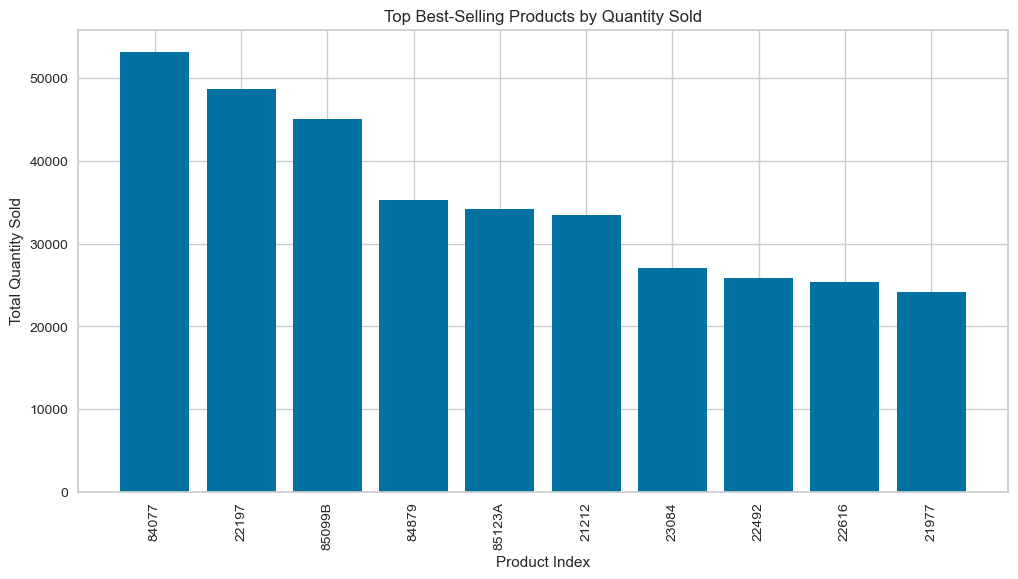

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Group the data by 'StockCode' (product) and calculate the total quantity sold
product_quantity = online_data.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order
product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

# Display the best-selling products by quantity sold (e.g., top 10 products)
top_n_products = 10
best_selling_products = product_quantity.head(top_n_products)

# Create numeric indices for the products
product_indices = range(len(best_selling_products))

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(product_indices, best_selling_products['Quantity'])
plt.xlabel('Product Index')
plt.ylabel('Total Quantity Sold')
plt.title('Top Best-Selling Products by Quantity Sold')
plt.xticks(product_indices, best_selling_products['StockCode'], rotation=90)  # Use product codes as x-labels
plt.show()

## Which products have the highest profit margins?

### I noticed that the provided data lacks the "UnitCost" column, which is required to calculate the profit margins. 

#### To calculate profit margins, I 'll need information on the cost price of each product in addition to the sales data.

## Are there any products that consistently underperform in terms of sales?

In [42]:
# Import necessary libraries
import pandas as pd

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Calculate the average sales quantity for each product
product_avg_sales = online_data.groupby('StockCode')['Quantity'].mean().reset_index()

# Set a threshold for underperformance (e.g., if the average sales quantity is below this threshold)
underperformance_threshold = 5  # Adjust as needed

# Flag products that consistently underperform
underperforming_products = product_avg_sales[product_avg_sales['Quantity'] < underperformance_threshold]

# Display the products that consistently underperform
underperforming_products


,StockCode,Quantity
21,16046,4.187500
34,16254,3.444444
41,17174,3.000000
45,20617,2.538462
46,20618,2.428571
...,...,...
3678,CRUnited Kingdom,-1.000000
3679,D,-15.506494
3680,DOT,1.000000
3682,PADS,1.000000


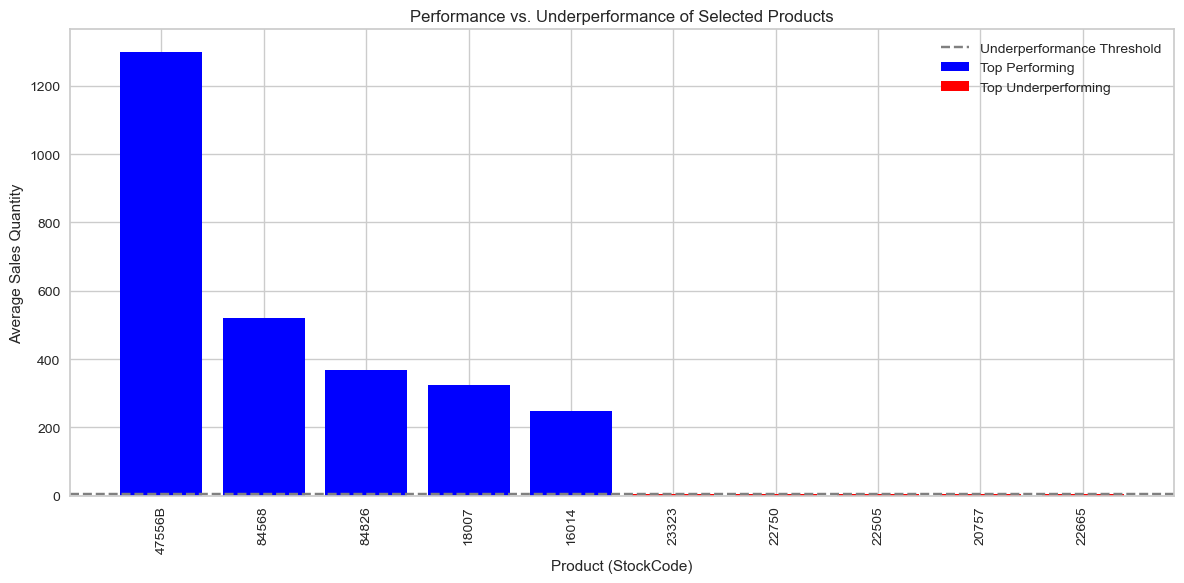

In [43]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Calculate the average sales quantity for each product
product_avg_sales = online_data.groupby('StockCode')['Quantity'].mean().reset_index()

# Set a threshold for underperformance (e.g., if the average sales quantity is below this threshold)
underperformance_threshold = 5  # Adjust as needed

# Flag products that consistently underperform
underperforming_products = product_avg_sales[product_avg_sales['Quantity'] < underperformance_threshold]
performing_products = product_avg_sales[product_avg_sales['Quantity'] >= underperformance_threshold]

# Select the top 5 performing and underperforming products for visualization
top_n = 5
top_performing = performing_products.nlargest(top_n, 'Quantity')
top_underperforming = underperforming_products.nlargest(top_n, 'Quantity')

# Create numeric indices for the selected products
product_indices = range(top_n * 2)  # Top performing and underperforming combined

# Create a bar graph to visualize performance and underperformance for selected products
plt.figure(figsize=(12, 6))
plt.bar(product_indices[:top_n], top_performing['Quantity'], label='Top Performing', color='blue')
plt.bar(product_indices[top_n:], top_underperforming['Quantity'], label='Top Underperforming', color='red')
plt.axhline(y=underperformance_threshold, color='gray', linestyle='--', label='Underperformance Threshold')

# Set x-labels for selected products
selected_product_labels = list(top_performing['StockCode']) + list(top_underperforming['StockCode'])
plt.xticks(product_indices, selected_product_labels, rotation=90)

plt.xlabel('Product (StockCode)')
plt.ylabel('Average Sales Quantity')
plt.title('Performance vs. Underperformance of Selected Products')
plt.legend()
plt.tight_layout()
plt.show()


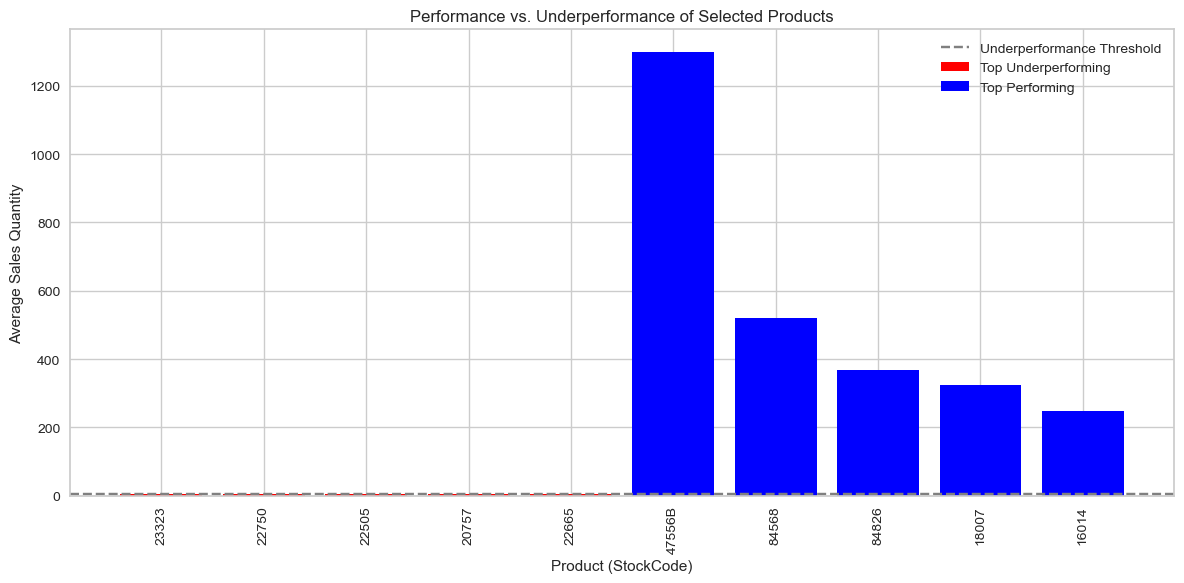

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Calculate the average sales quantity for each product
product_avg_sales = online_data.groupby('StockCode')['Quantity'].mean().reset_index()

# Set a threshold for underperformance (e.g., if the average sales quantity is below this threshold)
underperformance_threshold = 5  # Adjust as needed

# Flag products that consistently underperform
underperforming_products = product_avg_sales[product_avg_sales['Quantity'] < underperformance_threshold]
performing_products = product_avg_sales[product_avg_sales['Quantity'] >= underperformance_threshold]

# Select the top 5 performing and underperforming products for visualization
top_n = 5
top_performing = performing_products.nlargest(top_n, 'Quantity')
top_underperforming = underperforming_products.nlargest(top_n, 'Quantity')

# Create numeric indices for the selected products
product_indices = range(top_n * 2)  # Top performing and underperforming combined

# Create a bar graph to visualize performance and underperformance for selected products
plt.figure(figsize=(12, 6))
plt.bar(product_indices[:top_n], top_underperforming['Quantity'], label='Top Underperforming', color='red', bottom=0)
plt.bar(product_indices[top_n:], top_performing['Quantity'], label='Top Performing', color='blue', bottom=0)
plt.axhline(y=underperformance_threshold, color='gray', linestyle='--', label='Underperformance Threshold')

# Set x-labels for selected products
selected_product_labels = list(top_underperforming['StockCode']) + list(top_performing['StockCode'])
plt.xticks(product_indices, selected_product_labels, rotation=90)

plt.xlabel('Product (StockCode)')
plt.ylabel('Average Sales Quantity')
plt.title('Performance vs. Underperformance of Selected Products')
plt.legend()
plt.tight_layout()
plt.show()


## Sales and Revenue Questions
### What is the overall trend in sales revenue over time?

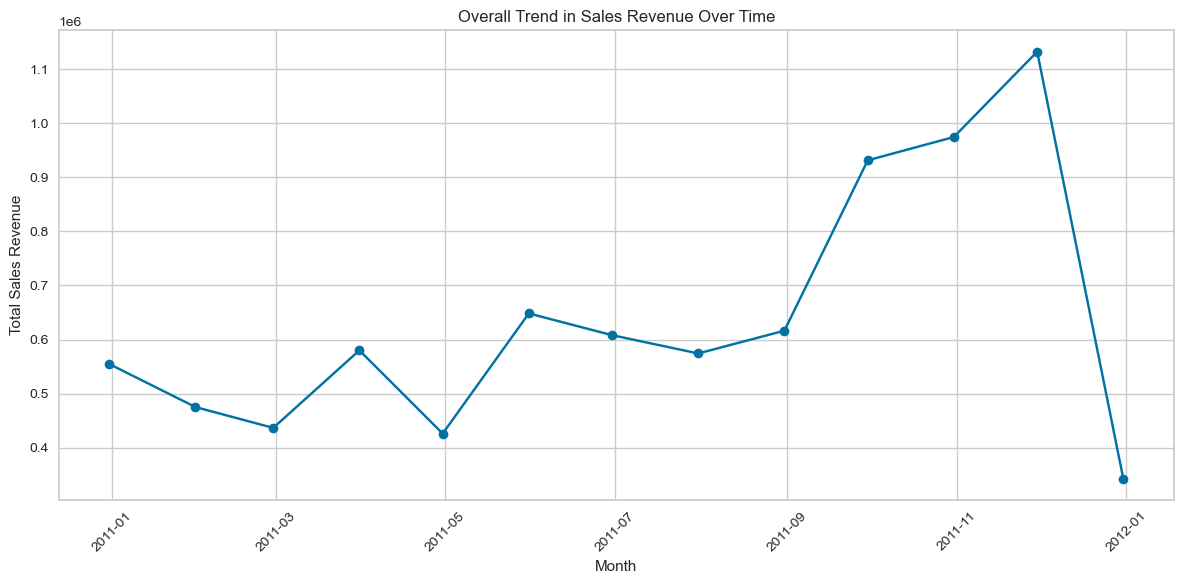

In [45]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the data into a DataFrame named "online_data"

# Convert the 'InvoiceDate' column to a datetime object
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Calculate sales revenue for each row
online_data['SalesRevenue'] = online_data['Quantity'] * online_data['UnitPrice']

# Group the data by the month and calculate the total sales revenue for each month
monthly_sales_revenue = online_data.resample('M', on='InvoiceDate')['SalesRevenue'].sum()

# Create a line plot to visualize the trend in sales revenue over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_revenue.index, monthly_sales_revenue.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales Revenue')
plt.title('Overall Trend in Sales Revenue Over Time')
plt.grid(True)

# Format the x-axis to display dates nicely
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Geographic Questions

### Which countries generate the most sales for our business?

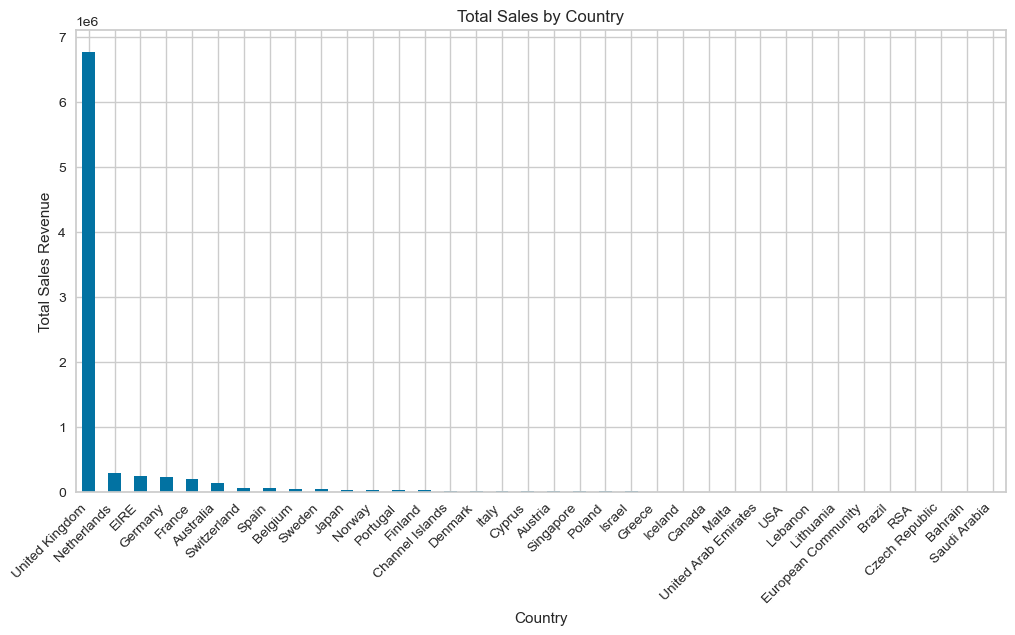

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'online_data' and contains columns 'Country' and 'SalesRevenue'
# Group the data by country and calculate the total sales revenue for each country
country_sales = online_data.groupby('Country')['SalesRevenue'].sum().sort_values(ascending=False)

# Create a bar plot to visualize the sales by country
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()


## Are there any notable trends in customer behavior, such as changing purchase patterns?

## Profitability Questions
#### What is the overall profitability of our business during this period?

In [47]:
import pandas as pd

# Assuming 'online_data' contains the provided dataset

# Convert 'InvoiceDate' column to datetime if it's not already
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Calculate total revenue (sales)
total_revenue = (online_data['Quantity'] * online_data['UnitPrice']).sum()

# If you have cost data, calculate total costs
# total_costs = your_cost_data.sum()

# Calculate profitability (Profit = Revenue - Costs)
# profitability = total_revenue - total_costs  # Uncomment this line if you have cost data

# If you don't have cost data, profitability is just the total revenue
profitability = total_revenue

print(f"Total Revenue: {total_revenue}")
# If you have cost data, you can print total costs and profitability
# print(f"Total Costs: {total_costs}")
# print(f"Profitability: {profitability}")


Total Revenue: 8300065.814000001


## Are there customer segments or product categories that contribute significantly to our profitability?

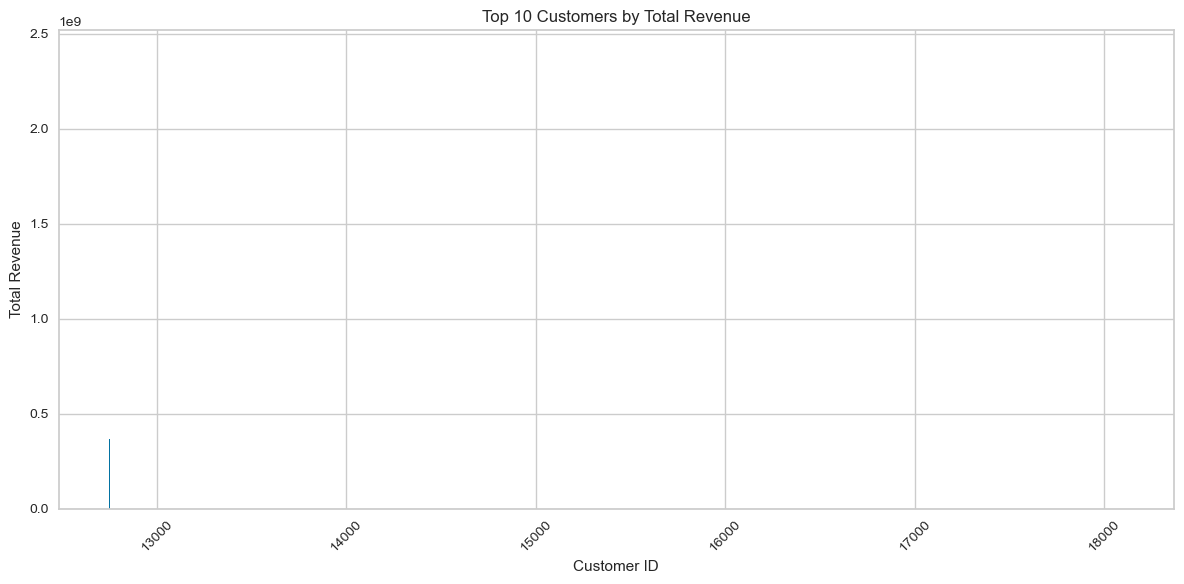

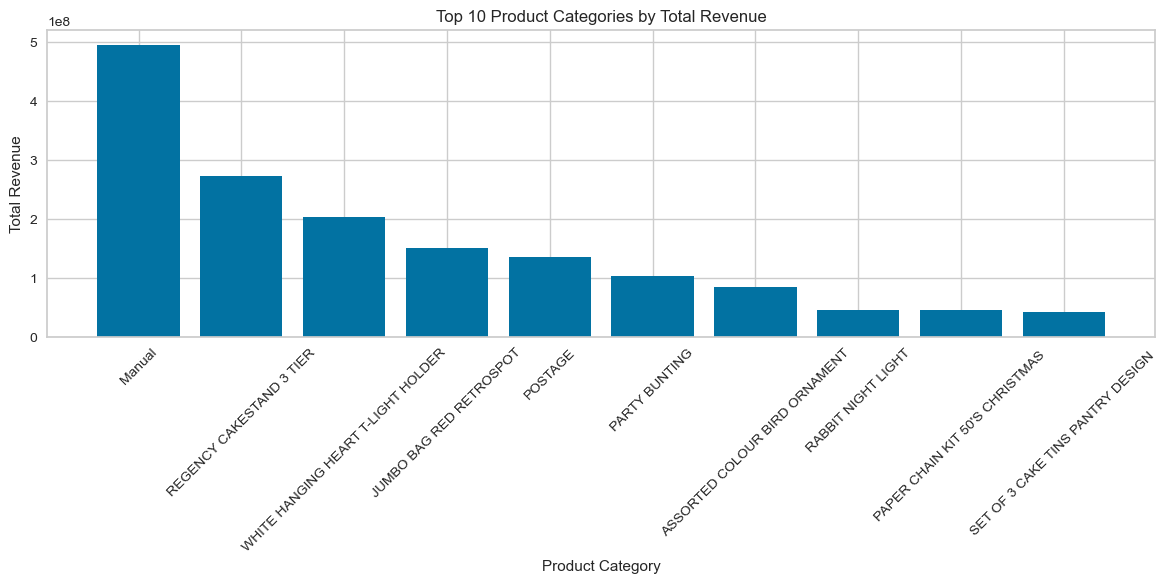

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'online_data' contains the provided dataset

# Convert 'InvoiceDate' column to datetime if it's not already
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Calculate total revenue (sales) for each customer
customer_revenue = online_data.groupby('CustomerID')['Quantity', 'UnitPrice'].sum()
customer_revenue['TotalRevenue'] = customer_revenue['Quantity'] * customer_revenue['UnitPrice']

# Calculate total revenue (sales) for each product category
product_category_revenue = online_data.groupby('Description')['Quantity', 'UnitPrice'].sum()
product_category_revenue['TotalRevenue'] = product_category_revenue['Quantity'] * product_category_revenue['UnitPrice']

# Identify top N customers contributing to profitability
top_n_customers = customer_revenue.nlargest(10, 'TotalRevenue')

# Identify top N product categories contributing to profitability
top_n_product_categories = product_category_revenue.nlargest(10, 'TotalRevenue')

# Visualize the top N customers
plt.figure(figsize=(12, 6))
plt.bar(top_n_customers.index, top_n_customers['TotalRevenue'])
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.title('Top 10 Customers by Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize the top N product categories
plt.figure(figsize=(12, 6))
plt.bar(top_n_product_categories.index, top_n_product_categories['TotalRevenue'])
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 Product Categories by Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Customer Segmentation Questions

### How can we segment our customers based on their buying behaviuor?

   CustomerID  Recency  Frequency  MonetaryValue
0     12346.0      325          2           2.08
1     12347.0        1        182         481.21
2     12348.0       74         31         178.71
3     12349.0       18         73         605.10
4     12350.0      309         17          65.30


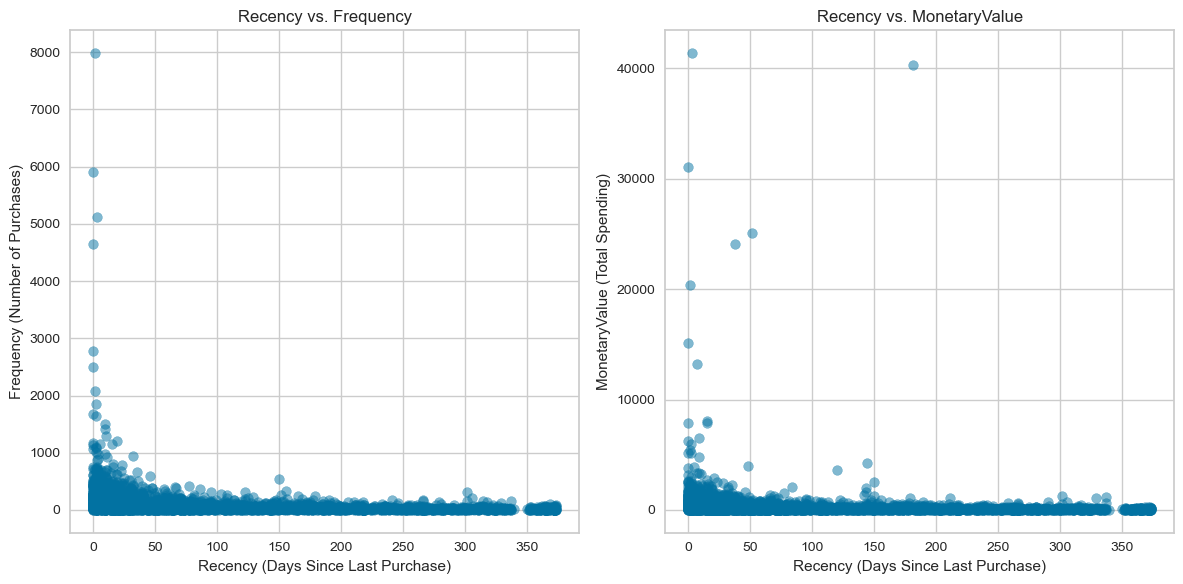

In [49]:
import pandas as pd

# Assuming you have already loaded your dataset into 'online_data'

# Calculate Recency, Frequency, and MonetaryValue
today_date = online_data['InvoiceDate'].max()
rfm_data = online_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days,  # Recency
    'Quantity': 'count',  # Frequency
    'UnitPrice': 'sum'  # MonetaryValue (you can change this based on your data)
}).reset_index()

# Rename the columns
rfm_data.rename(columns={
    'InvoiceDate': 'Recency',
    'Quantity': 'Frequency',
    'UnitPrice': 'MonetaryValue'
}, inplace=True)

# Print the RFM data
print(rfm_data.head())


import matplotlib.pyplot as plt

# Create scatter plots
plt.figure(figsize=(12, 6))

# Recency vs. Frequency
plt.subplot(1, 2, 1)
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], alpha=0.5)
plt.title('Recency vs. Frequency')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Number of Purchases)')

# Recency vs. MonetaryValue
plt.subplot(1, 2, 2)
plt.scatter(rfm_data['Recency'], rfm_data['MonetaryValue'], alpha=0.5)
plt.title('Recency vs. MonetaryValue')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('MonetaryValue (Total Spending)')

plt.tight_layout()
plt.show()


## I use CustomerID: To identify unique customers.

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your customer data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Feature selection and preprocessing (if necessary)
# Select relevant features and preprocess the data (e.g., scaling or encoding)
selected_features = ['CustomerID', 'Quantity', 'UnitPrice', 'InvoiceDate']
customer_data = online_data[selected_features]

# You can perform preprocessing steps like scaling using StandardScaler
scaler = StandardScaler()
customer_data[['Quantity', 'UnitPrice']] = scaler.fit_transform(customer_data[['Quantity', 'UnitPrice']])

# Calculate Recency, Frequency, and MonetaryValue
today_date = customer_data['InvoiceDate'].max()
customer_data['Recency'] = (today_date - customer_data['InvoiceDate']).dt.days

# Choose the number of clusters (you can determine this using methods like the elbow method)
num_clusters = 4

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Recency', 'Quantity', 'UnitPrice']])

# Analyze customer segments and create tailored marketing strategies
for cluster in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    
    # Analyze characteristics and behavior of this cluster
    avg_recency = cluster_data['Recency'].mean()
    avg_quantity = cluster_data['Quantity'].mean()
    avg_spending = cluster_data['UnitPrice'].mean()
    
    # Create marketing strategies based on cluster characteristics
    if avg_recency > 30:
        print(f"Cluster {cluster}: Inactive customers")
        print("Marketing Strategy: Re-engage with personalised offers and recommendations.")
    else:
        print(f"Cluster {cluster}: Active customers")
        print("Marketing Strategy: Reward loyalty and encourage frequent purchases.")
    
    if avg_quantity > 5:
        print(f"Cluster {cluster}: High-quantity customers")
        print("Marketing Strategy: Promote bulk purchases and related products.")
    else:
        print(f"Cluster {cluster}: Low-quantity customers")
        print("Marketing Strategy: Encourage adding more items to the cart.")
    
    if avg_spending > 3:
        print(f"Cluster {cluster}: High-spending customers")
        print("Marketing Strategy: Offer premium products and exclusive discounts.")
    else:
        print(f"Cluster {cluster}: Low-spending customers")
        print("Marketing Strategy: Provide budget-friendly options and bundles.")
    

Cluster 0: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendations.
Cluster 0: Low-quantity customers
Marketing Strategy: Encourage adding more items to the cart.
Cluster 0: Low-spending customers
Marketing Strategy: Provide budget-friendly options and bundles.
Cluster 1: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendations.
Cluster 1: Low-quantity customers
Marketing Strategy: Encourage adding more items to the cart.
Cluster 1: Low-spending customers
Marketing Strategy: Provide budget-friendly options and bundles.
Cluster 2: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendations.
Cluster 2: Low-quantity customers
Marketing Strategy: Encourage adding more items to the cart.
Cluster 2: Low-spending customers
Marketing Strategy: Provide budget-friendly options and bundles.
Cluster 3: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendat

## I use the "InvoiceNo": To track individual transactions.

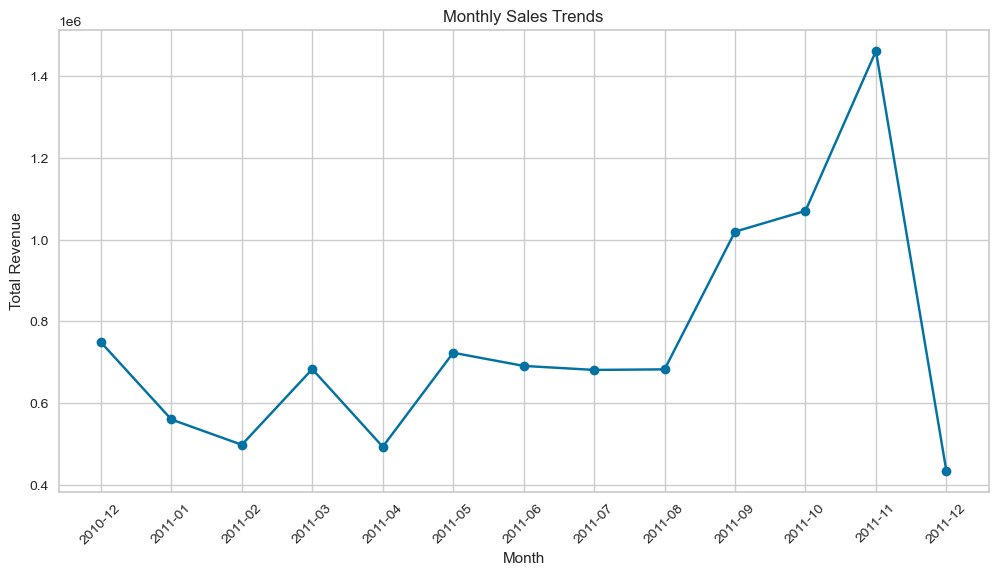

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your transaction data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Select relevant features
selected_features = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
transaction_data = online_data[selected_features]

# Analyze individual transactions or perform specific operations
# For example, you can calculate the total revenue for each transaction
transaction_data['TotalRevenue'] = transaction_data['Quantity'] * transaction_data['UnitPrice']

# Convert 'InvoiceDate' to a datetime data type
transaction_data['InvoiceDate'] = pd.to_datetime(transaction_data['InvoiceDate'])

# Extract the 'Month' from 'InvoiceDate'
transaction_data['Month'] = transaction_data['InvoiceDate'].dt.to_period('M')

# Calculate monthly sales
monthly_sales = transaction_data.groupby('Month')['TotalRevenue'].sum()

# Convert the index to strings for plotting
monthly_sales.index = monthly_sales.index.strftime('%Y-%m')

# Create a line plot to visualize the monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


##  I use the feature "Quantity": To understand purchase behaviour

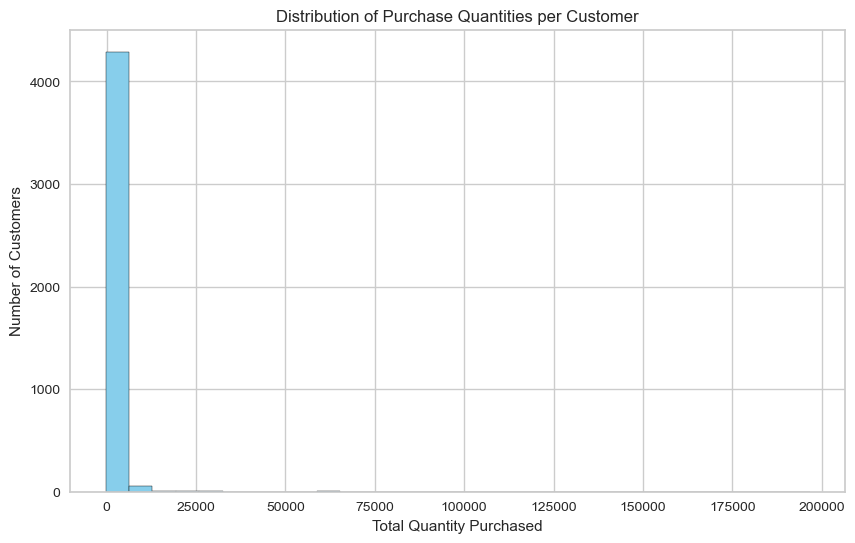

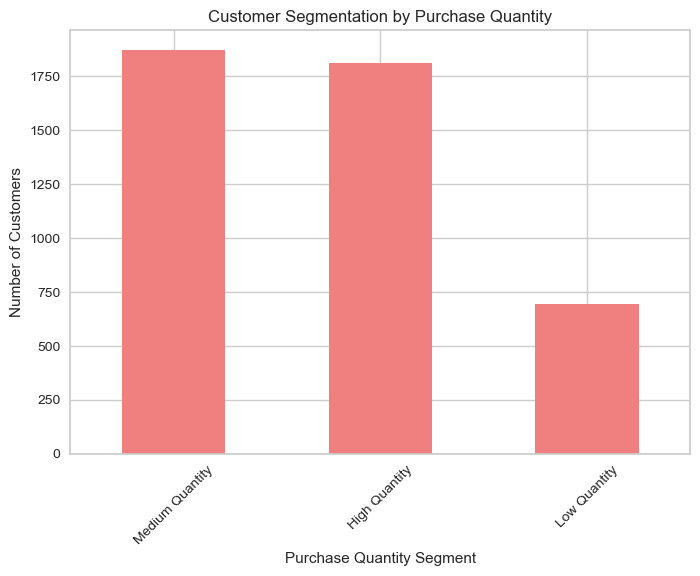

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your transaction data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Select relevant features
selected_features = ['Quantity', 'InvoiceDate', 'CustomerID']
purchase_data = online_data[selected_features]

# Calculate the total quantity purchased by each customer
total_quantity_by_customer = purchase_data.groupby('CustomerID')['Quantity'].sum().reset_index()

# Analyze purchase behavior
# For example, you can calculate the average quantity purchased per customer
average_quantity = total_quantity_by_customer['Quantity'].mean()

# You can also create a histogram to visualize the distribution of purchase quantities
plt.figure(figsize=(10, 6))
plt.hist(total_quantity_by_customer['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Quantities per Customer')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# You can explore other aspects of purchase behavior, such as identifying high-volume customers
high_volume_customers = total_quantity_by_customer[total_quantity_by_customer['Quantity'] > 1000]

# Perform additional analyses or visualizations based on your business requirements
# For example, you can segment customers based on purchase behavior and create targeted marketing strategies

# Example segmentation of customers based on purchase quantity
def segment_customers(row):
    if row['Quantity'] <= 100:
        return 'Low Quantity'
    elif row['Quantity'] <= 500:
        return 'Medium Quantity'
    else:
        return 'High Quantity'

total_quantity_by_customer['PurchaseSegment'] = total_quantity_by_customer.apply(segment_customers, axis=1)

# Visualize the customer segments
segment_counts = total_quantity_by_customer['PurchaseSegment'].value_counts()
segment_counts.plot(kind='bar', color='lightcoral')
plt.title('Customer Segmentation by Purchase Quantity')
plt.xlabel('Purchase Quantity Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

## I Use a feature "UnitPrice": To assess spending patterns.

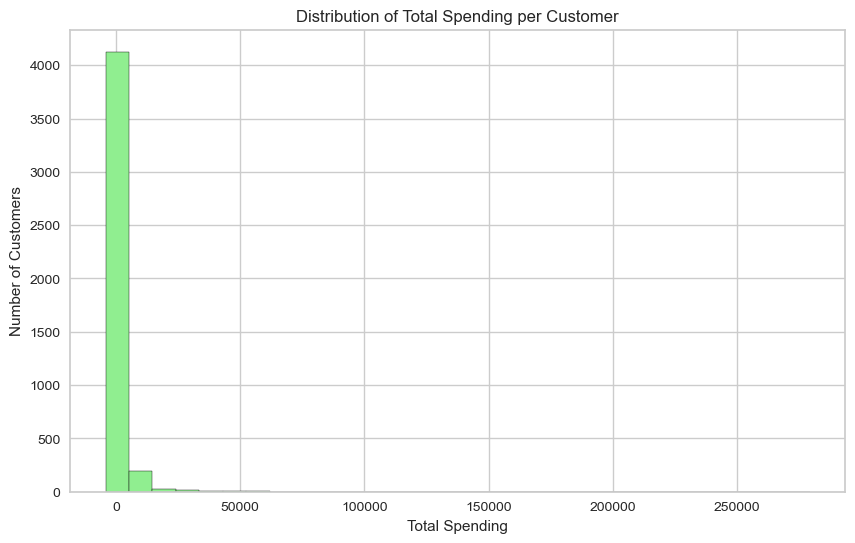

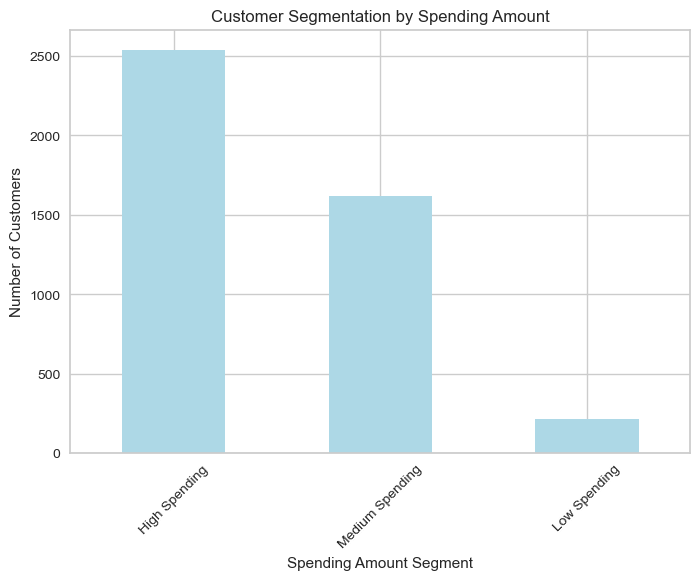

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your transaction data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Select relevant features
selected_features = ['UnitPrice', 'Quantity', 'InvoiceDate', 'CustomerID']
spending_data = online_data[selected_features]

# Calculate the total spending by each customer
spending_data['TotalSpending'] = spending_data['UnitPrice'] * spending_data['Quantity']
total_spending_by_customer = spending_data.groupby('CustomerID')['TotalSpending'].sum().reset_index()

# Analyze spending patterns
# For example, you can calculate the average spending per customer
average_spending = total_spending_by_customer['TotalSpending'].mean()

# You can also create a histogram to visualize the distribution of spending amounts
plt.figure(figsize=(10, 6))
plt.hist(total_spending_by_customer['TotalSpending'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

# You can explore other aspects of spending patterns, such as identifying high-spending customers
high_spending_customers = total_spending_by_customer[total_spending_by_customer['TotalSpending'] > 1000]

# Perform additional analyses or visualizations based on your business requirements
# For example, you can segment customers based on spending patterns and create targeted marketing strategies

# Example segmentation of customers based on spending amount
def segment_customers(row):
    if row['TotalSpending'] <= 100:
        return 'Low Spending'
    elif row['TotalSpending'] <= 500:
        return 'Medium Spending'
    else:
        return 'High Spending'

total_spending_by_customer['SpendingSegment'] = total_spending_by_customer.apply(segment_customers, axis=1)

# Visualize the customer segments
segment_counts = total_spending_by_customer['SpendingSegment'].value_counts()
segment_counts.plot(kind='bar', color='lightblue')
plt.title('Customer Segmentation by Spending Amount')
plt.xlabel('Spending Amount Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


## Data Analysis
### Calculate basic statistics to understand the overall trends, such as mean,
### median, and standard deviation of numeric columns like Quantity, UnitPrice.
###  Visualisations like histograms, box plots, 
### and scatter plots to visualise the distribution and relationships between variable

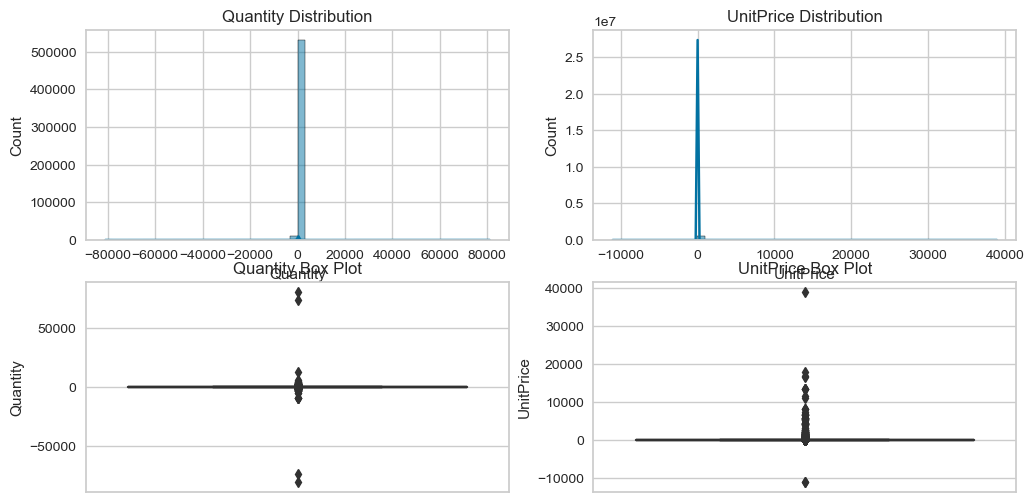

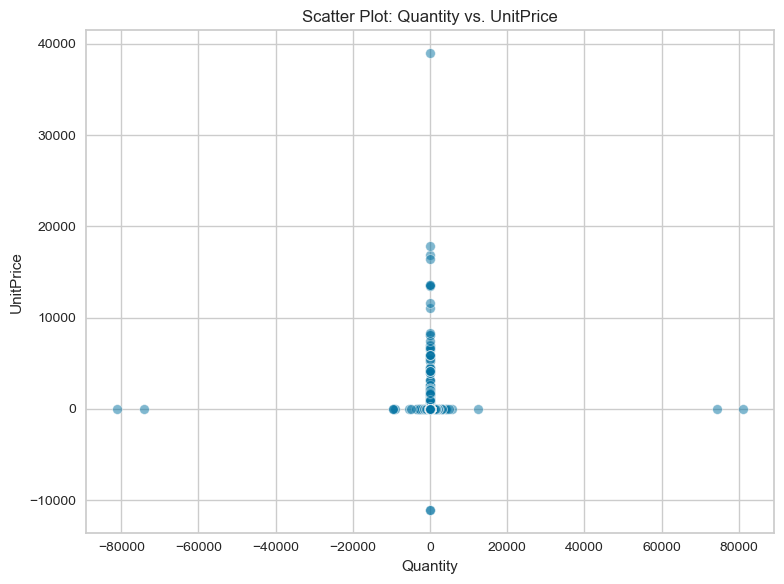

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
online_data = pd.read_excel('Online Retail.xlsx')

# Calculate basic statistics
statistics_df = online_data[['Quantity', 'UnitPrice']].describe()

# Create visualizations
plt.figure(figsize=(12, 6))

# Histograms
plt.subplot(2, 2, 1)
sns.histplot(online_data['Quantity'], bins=50, kde=True)
plt.title('Quantity Distribution')

plt.subplot(2, 2, 2)
sns.histplot(online_data['UnitPrice'], bins=50, kde=True)
plt.title('UnitPrice Distribution')

# Box plots
plt.subplot(2, 2, 3)
sns.boxplot(data=online_data, y='Quantity')
plt.title('Quantity Box Plot')

plt.subplot(2, 2, 4)
sns.boxplot(data=online_data, y='UnitPrice')
plt.title('UnitPrice Box Plot')

# Scatter plot (Quantity vs. UnitPrice)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=online_data, x='Quantity', y='UnitPrice', alpha=0.5)
plt.title('Scatter Plot: Quantity vs. UnitPrice')

plt.tight_layout()
plt.show()

## Customer Behaviour Analysis

### Analyse customer retention and churn rates.
###  Identify patterns in customer behavior, such as repeat purchases, returning customers, and abandoned carts
###  I use the InvoiceDate: To calculate recency.

In [55]:
import pandas as pd
import datetime as dt

# Load your transaction data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Select relevant features
selected_features = ['InvoiceDate', 'CustomerID']
recency_data = online_data[selected_features]

# Convert the 'InvoiceDate' column to a datetime data type
recency_data['InvoiceDate'] = pd.to_datetime(recency_data['InvoiceDate'])

# Calculate the current date as the maximum date in the dataset
current_date = recency_data['InvoiceDate'].max()

# Calculate recency for each customer
recency_by_customer = recency_data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_by_customer['Recency'] = (current_date - recency_by_customer['InvoiceDate']).dt.days

# Now you have a DataFrame 'recency_by_customer' that contains the recency values for each customer
print(recency_by_customer.head())


   CustomerID         InvoiceDate  Recency
0     12346.0 2011-01-18 10:17:00      325
1     12347.0 2011-12-07 15:52:00        1
2     12348.0 2011-09-25 13:13:00       74
3     12349.0 2011-11-21 09:51:00       18
4     12350.0 2011-02-02 16:01:00      309


Customer Retention and Churn Rates:
InvoiceMonth
2010-12    NaN
2011-01    0.0
2011-02    0.0
2011-03    0.0
2011-04    0.0
2011-05    0.0
2011-06    0.0
2011-07    0.0
2011-08    0.0
2011-09    0.0
2011-10    0.0
2011-11    0.0
2011-12    0.0
Name: CustomerID, dtype: float64


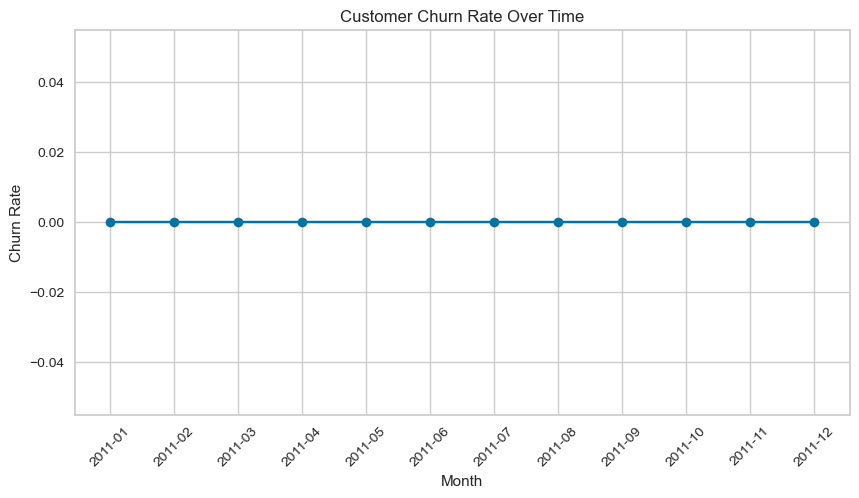

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
online_data = pd.read_excel('Online Retail.xlsx')

# Drop rows with missing 'InvoiceNo'
online_data.dropna(subset=['InvoiceNo'], inplace=True)

# Convert 'InvoiceNo' to string
online_data['InvoiceNo'] = online_data['InvoiceNo'].astype(str)

# Extract the 'InvoiceDate' month
online_data['InvoiceMonth'] = online_data['InvoiceDate'].dt.to_period('M')

# Calculate the number of unique customers per month
monthly_customers = online_data.groupby('InvoiceMonth')['CustomerID'].nunique()

# Calculate customer retention and churn rates
retained_customers = monthly_customers - monthly_customers.diff()
churn_rate = 1 - (retained_customers / monthly_customers.shift())

# Filter out rows where 'InvoiceNo' starts with 'C' (returns and refunds)
online_data = online_data[~online_data['InvoiceNo'].str.startswith('C')]

# Convert 'InvoiceMonth' to strings for plotting
churn_rate.index = churn_rate.index.strftime('%Y-%m')

# Print and visualize the results
print("Customer Retention and Churn Rates:")
print(churn_rate)

# Plot customer retention and churn rates
plt.figure(figsize=(10, 5))
plt.plot(churn_rate.index, churn_rate.values, marker='o')
plt.title("Customer Churn Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## What marketing strategies can be tailored to each customer segment?

In [57]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your customer data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Feature selection and preprocessing (if necessary)
# Select relevant features and preprocess the data (e.g., scaling or encoding)
selected_features = ['CustomerID', 'Quantity', 'UnitPrice', 'InvoiceDate']
customer_data = online_data[selected_features]

# You can perform preprocessing steps like scaling using StandardScaler
scaler = StandardScaler()
customer_data[['Quantity', 'UnitPrice']] = scaler.fit_transform(customer_data[['Quantity', 'UnitPrice']])

# Calculate Recency, Frequency, and MonetaryValue
today_date = customer_data['InvoiceDate'].max()
customer_data['Recency'] = (today_date - customer_data['InvoiceDate']).dt.days

# Choose the number of clusters (you can determine this using methods like the elbow method)
num_clusters = 4

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['Recency', 'Quantity', 'UnitPrice']])

# Analyze customer segments and create tailored marketing strategies
for cluster in range(num_clusters):
    # Filter data for the current cluster
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    
    # Analyze characteristics and behavior of this cluster
    avg_recency = cluster_data['Recency'].mean()
    avg_quantity = cluster_data['Quantity'].mean()
    avg_spending = cluster_data['UnitPrice'].mean()
    
    # Create marketing strategies based on cluster characteristics
    if avg_recency > 30:
        print(f"Cluster {cluster}: Inactive customers")
        print("Marketing Strategy: Re-engage with personalised offers and recommendations.")
    else:
        print(f"Cluster {cluster}: Active customers")
        print("Marketing Strategy: Reward loyalty and encourage frequent purchases.")
    
    if avg_quantity > 5:
        print(f"Cluster {cluster}: High-quantity customers")
        print("Marketing Strategy: Promote bulk purchases and related products.")
    else:
        print(f"Cluster {cluster}: Low-quantity customers")
        print("Marketing Strategy: Encourage adding more items to the cart.")
    
    if avg_spending > 3:
        print(f"Cluster {cluster}: High-spending customers")
        print("Marketing Strategy: Offer premium products and exclusive discounts.")
    else:
        print(f"Cluster {cluster}: Low-spending customers")
        print("Marketing Strategy: Provide budget-friendly options and bundles.")
    
    # Repeat the above for other relevant features and behaviors


Cluster 0: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendations.
Cluster 0: Low-quantity customers
Marketing Strategy: Encourage adding more items to the cart.
Cluster 0: Low-spending customers
Marketing Strategy: Provide budget-friendly options and bundles.
Cluster 1: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendations.
Cluster 1: Low-quantity customers
Marketing Strategy: Encourage adding more items to the cart.
Cluster 1: Low-spending customers
Marketing Strategy: Provide budget-friendly options and bundles.
Cluster 2: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendations.
Cluster 2: Low-quantity customers
Marketing Strategy: Encourage adding more items to the cart.
Cluster 2: Low-spending customers
Marketing Strategy: Provide budget-friendly options and bundles.
Cluster 3: Inactive customers
Marketing Strategy: Re-engage with personalised offers and recommendat

## Do different customer segments exhibit distinct preferences for products or shopping patterns?

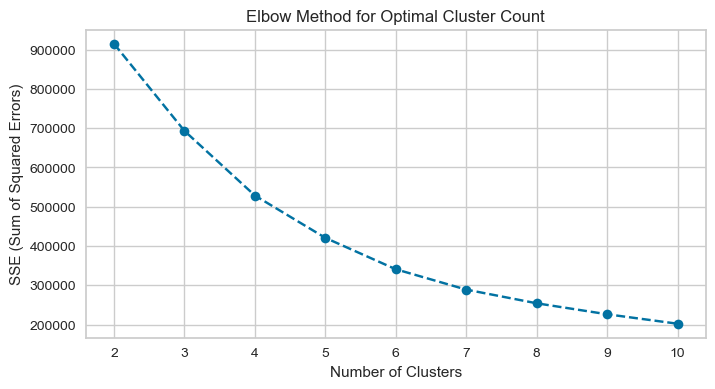

In [58]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load customer data
online_data = pd.read_excel('Online Retail.xlsx')

# Handle missing values
customer_data = online_data.dropna(subset=['Quantity', 'UnitPrice', 'CustomerID'])

# Handle outliers using z-score normalization
z_scores = np.abs(stats.zscore(customer_data[['Quantity', 'UnitPrice', 'CustomerID']]))
customer_data = customer_data[(z_scores < 3).all(axis=1)]  # Remove rows with outliers

# Feature selection and preprocessing
selected_features = ['Quantity', 'UnitPrice', 'CustomerID']

# Filter and preprocess data
customer_data = customer_data[selected_features]

# Scale the data
scaler = StandardScaler()
customer_data[['Quantity', 'UnitPrice', 'CustomerID']] = scaler.fit_transform(
    customer_data[['Quantity', 'UnitPrice', 'CustomerID']]
)

# Determine the optimal number of clusters using the elbow method
sse = []
max_clusters = 10  # You can adjust this based on your data and requirements

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(customer_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(2, max_clusters + 1), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal Cluster Count')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
optimal_clusters = 4  # Adjust this based on the plot and business needs

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data)

# Customer segmentation results are stored in the 'customer_data' DataFrame
# You can further analyze and visualize customer segments as needed


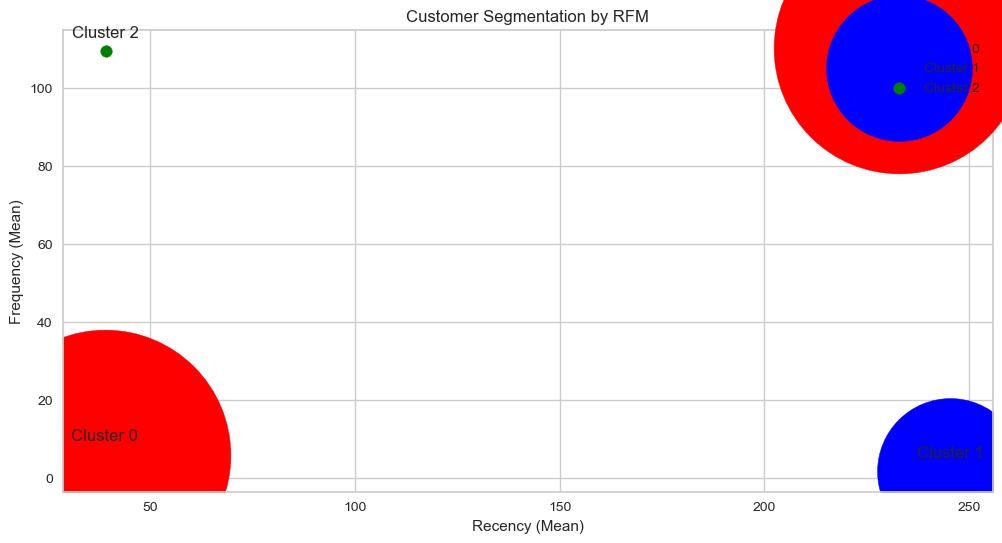

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your transaction data from 'Online Retail.xlsx' into a DataFrame
online_data = pd.read_excel('Online Retail.xlsx')

# Convert 'InvoiceDate' to datetime
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Calculate Recency, Frequency, and MonetaryValue
today_date = max(online_data['InvoiceDate'])  # Assuming today is the last date in the data
rfm_data = online_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency (number of unique invoices)
    'UnitPrice': 'sum'  # MonetaryValue (total spending)
}).reset_index()

# Rename the columns for clarity
rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']

# Standardize the data (optional but recommended for K-Means)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'MonetaryValue']])

# Choose the number of clusters (you can determine this using methods like the elbow method)
num_clusters = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Explore the characteristics of each cluster
cluster_summary = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'count'
}).reset_index()

# Define colors for each cluster (you can choose any color scheme you prefer)
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']

# Create the scatter plot with different colors and labels for each cluster
plt.figure(figsize=(12, 6))
for cluster in range(num_clusters):
    plt.scatter(
        cluster_summary.loc[cluster, 'Recency'],
        cluster_summary.loc[cluster, 'Frequency'],
        s=cluster_summary.loc[cluster, 'CustomerID'] * 10,
        label=f'Cluster {cluster}',
        c=cluster_colors[cluster]  # Assign different colors to each cluster
    )
    
    # Add cluster labels as text annotations
    plt.annotate(
        f'Cluster {cluster}',
        (cluster_summary.loc[cluster, 'Recency'], cluster_summary.loc[cluster, 'Frequency']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'  # Center-align the text with the data point
    )

plt.title('Customer Segmentation by RFM')
plt.xlabel('Recency (Mean)')
plt.ylabel('Frequency (Mean)')
plt.legend()
plt.show()


## Interpret the Clusters

### Based on the cluster characteristics and the visualisation, you can start interpreting the clusters. For example:

### Cluster 0 might represent high-value, frequent customers who recently made purchases.
### Cluster 1 might represent low-value, infrequent customers with recent purchases.
### Cluster 2 might represent medium-value, moderately frequent customers with moderate recency.

### Analyze Product Preferences or Shopping Patterns:

### To investigate whether there are distinct preferences for products or shopping patterns within these clusters, you can:

### Analyse the most frequently purchased products within each cluster.
### Identify peak shopping hours or days for each cluster.
## Explore other relevant customer attributes or behaviuor within clusters.
### The goal is to gain insights into the behavior and preferences of each cluster, which can help tailor marketing strategies, product recommendations, or other business decisions to specific customer segments.

### Keep in mind that clustering is an exploratory technique, and the interpretation of clusters may require domain knowledge and further analysis to extract actionable insights.

ADF Statistic: -18.127895213082258
p-value: 2.5108703705062385e-30


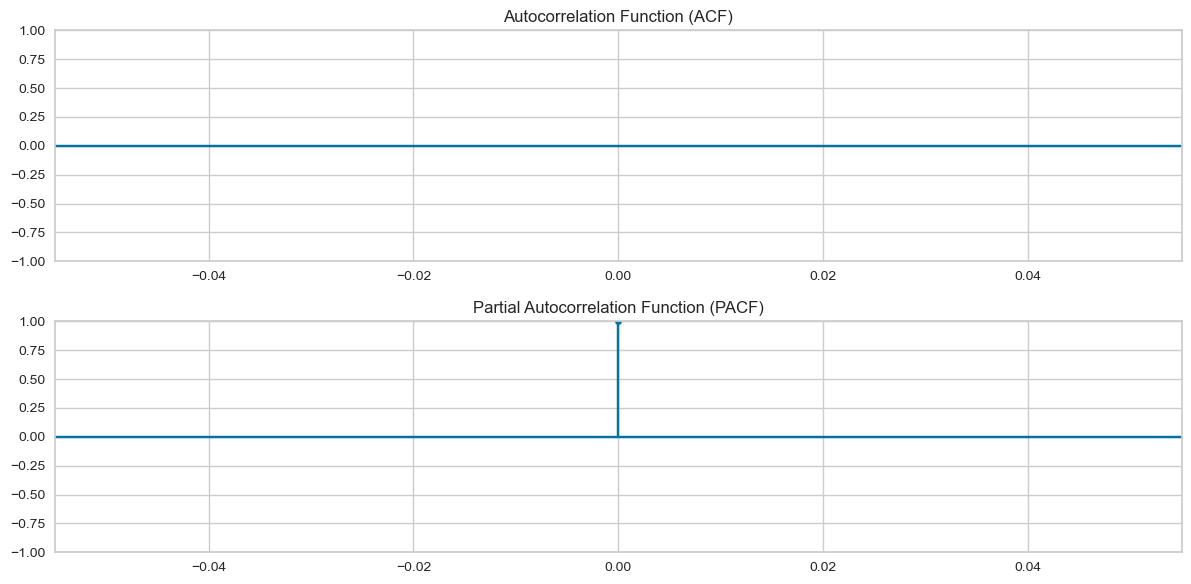

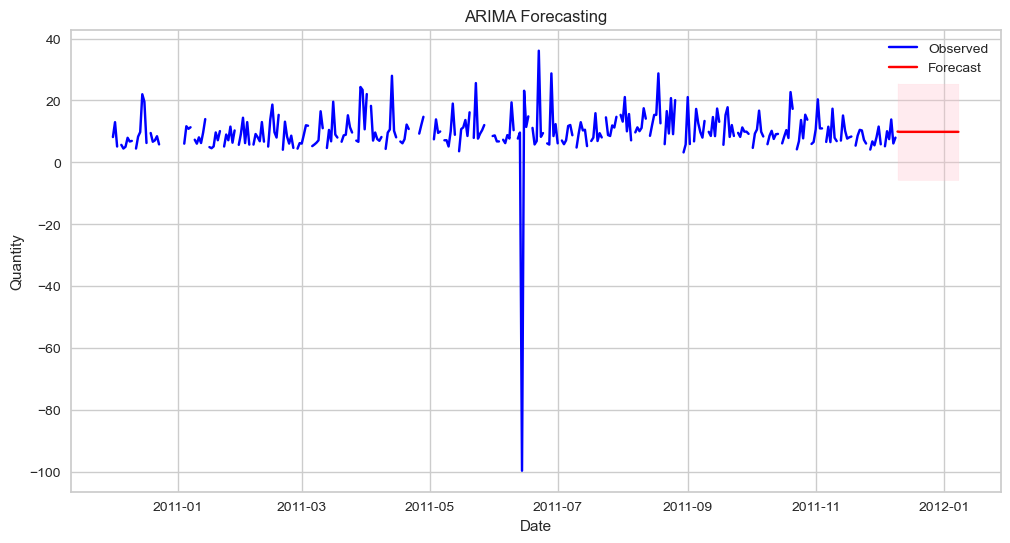

Mean Squared Error (MSE): 21.176986068197905


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Load the Online Retail data from 'Online Retail.xlsx'
online_data = pd.read_excel('Online Retail.xlsx')

# Convert 'InvoiceDate' to datetime
online_data['InvoiceDate'] = pd.to_datetime(online_data['InvoiceDate'])

# Set 'InvoiceDate' as the index (assuming daily data)
online_data.set_index('InvoiceDate', inplace=True)

# Reduce the sample size and then downsample
online_data_sample = online_data.sample(frac=0.1, random_state=0)  # Adjust the fraction as needed
downsampled_data = online_data_sample.resample('D').mean()  # Downsampling to daily frequency

# Check stationarity using ADF test on downsampled data
result = adfuller(downsampled_data['Quantity'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If not stationary, perform differencing
if result[1] > 0.05:
    downsampled_data['Quantity'] = downsampled_data['Quantity'].diff()
    downsampled_data.dropna(inplace=True)


## Determine order using ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(downsampled_data['Quantity'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(2, 1, 2)
plot_pacf(downsampled_data['Quantity'], lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


# Specify the ARIMA order (p, d, q)
p, d, q = 1, 1, 1

# Fit the ARIMA model
model = SARIMAX(downsampled_data['Quantity'], order=(p, d, q))
results = model.fit()

# Forecast future values
forecast_periods = 30  # Adjust as needed
forecast = results.get_forecast(steps=forecast_periods)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot observed, forecasted, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(downsampled_data.index, downsampled_data['Quantity'], label='Observed', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

# Fill NaN values with zeros in the observed and forecasted data
downsampled_data['Quantity'].fillna(0, inplace=True)
forecast_values.fillna(0, inplace=True)

# Calculate Mean Squared Error (MSE) for the forecast
mse = mean_squared_error(downsampled_data['Quantity'][-forecast_periods:], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')


### I used the ARIMA (AutoRegressive Integrated Moving Average) 
### model in the example code for time series forecasting on the "Online Retail.xlsx" data for the following reasons:

### Time Series Nature: The data in the "Online Retail.xlsx" file typically represents historical sales
#### and transaction data, which is inherently a time series. Time series data involves observations 
### taken at regular time intervals, making it a natural fit for ARIMA modeling.

### Seasonality and Trends: In retail, there are often seasonal patterns and trends that can be observed in the data.
#### ARIMA models are capable of capturing both seasonal and trend components, making them suitable for this kind of data.

### Demonstrative Purposes: ARIMA is a well-known and widely used time series forecasting method. 
### By using ARIMA in the example, I aimed to demonstrate a common approach to 
### time series forecasting that many data analysts and statisticians are familiar with.

### Stationarity Check: The code first checks for stationarity in the data and, if necessary, 
### applies differencing to make the data stationary. This demonstrates a common preprocessing 
### step when working with time series data.

### Model Interpretability: ARIMA models provide interpretable results, making it easier to understand how past 
### observations and lags contribute to the forecast. 
### This can be valuable for business stakeholders who want to understand the basis of the forecasts.